In [1]:
# Import libraries that we are going to use in the project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import csv
from sklearn.utils import shuffle

# We will be using two datasets, the first one is used on all classifiers, while the second one will be used for Naive Bayes 
# Only, because its extremely large

# Our first dataset which is a sample dataset taken from Kaggle and Sentiment140 and its used for highly complex classification
# algorithms that take forever to excute in large datasets.This sample was taken with an equal distribution of the positive 
# and negative sentiments and will be used in all classifiers 

data =  pd.read_csv(r'C:\Users\USER\Desktop\BE_datasets\data1.csv', skiprows=0, low_memory=False) 
# Shuffle the rows of the dataset 
data = shuffle(data)


# The dataset contains 1578612 tweets coming from two sources: Kaggle and Sentiment140. The Sentiment column correspond 
# to our label class taking a binary value, 0 if the tweet is negative, 1 if the tweet is positive.
data2= pd.read_csv(r'C:\Users\USER\Desktop\BE_datasets\data2.csv', skiprows=0, low_memory=False) 

# Reindex the data frames and drop the column added by the reset_index function
data.reset_index(drop=True, inplace=True)
data2.reset_index(drop=True, inplace=True)


# Set max_colwidth to 140 in order to fully see the tweet
pd.set_option('max_colwidth', 140)


In [5]:
import pandas as pd
pd.set_option('max_colwidth', 140)
data4= pd.read_csv(r'C:\Users\USER\Desktop\BE_datasets\data2.csv', skiprows=0, low_memory=False) 

In [8]:
data4=data4.drop(['ItemID','SentimentSource'], axis = 1)
data4.head(10)

,Sentiment,SentimentText
0,0,is so sad for my APL friend.............
1,0,I missed the New Moon trailer...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...
4,0,i think mi bf is cheating on me!!! T_T
5,0,or i just worry too much?
6,1,Juuuuuuuuuuuuuuuuussssst Chillin!!
7,0,Sunny Again Work Tomorrow :-| TV Tonight
8,1,handed in my uniform today . i miss you already
9,1,hmmmm.... i wonder how she my number @-)


In [2]:
# Display the last 10 rows of the first dataset
data.tail(10)

,Index,Sentiment,SentimentText
9990,6762,0,@sln25373 Awwwh ThankYouu..some people dont agree thoo xx
9991,400,1,@skyfire How close are you to finish development of app for Nokia S60 5th Edition phones? The N97 would just rock with skyfire on it
9992,3252,1,@tommcfly http://twitpic.com/3kygb - Hey Tom How are you? http://twitpic.com/3eumv Comment please
9993,5430,0,@shoelover79 this saturday night.... NOoooooooo!!
9994,4408,1,@stevie_ryan Happy B-Day Stevie. We love you. You rule
9995,524,1,@slightlyfamous it's kewl
9996,1455,1,"@sorabh Ebay, some things I get from customers who dont need it any more, like last 2620 I got for free The big luck was 1841 free"
9997,8166,0,@xo_amanda_xo I think I may be allergixe to something but I am not to sure as of yet. This is the 3rd weekend in a row tho...
9998,7990,0,"@tokaino sorry my tweet didn't give the details just a link to my site, so guessed I hadn't been clear enough (which is often the case!)"
9999,8317,0,@splorp no typecon this year a first in 5 years.


In [3]:
# Drop unneeded columns in the first dataset
data=data.drop(['Index'], axis = 1)
data

,Sentiment,SentimentText
0,0,@stephanieelise1 i only have 26 followers where is the love?
1,1,@SlapheadBlade You could have done all that paperwork yesterday.
2,0,@XoDoRaABbYxO mannnn ... ok ... not that i dont wanna chill w/ u guys but i wanna go to the movies toooo loll
3,1,@TomFelton EAT CHOCOALTE!! BOTH OF YOU
4,0,@spanishdollxxx damn and i missed it
...,...,...
9995,1,@slightlyfamous it's kewl
9996,1,"@sorabh Ebay, some things I get from customers who dont need it any more, like last 2620 I got for free The big luck was 1841 free"
9997,0,@xo_amanda_xo I think I may be allergixe to something but I am not to sure as of yet. This is the 3rd weekend in a row tho...
9998,0,"@tokaino sorry my tweet didn't give the details just a link to my site, so guessed I hadn't been clear enough (which is often the case!)"


In [4]:
#Display the first 10 rows of the second dataset 
data2.head(10)

,ItemID,Sentiment,SentimentSource,SentimentText
0,1,0,Sentiment140,is so sad for my APL friend.............
1,2,0,Sentiment140,I missed the New Moon trailer...
2,3,1,Sentiment140,omg its already 7:30 :O
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...
4,5,0,Sentiment140,i think mi bf is cheating on me!!! T_T
5,6,0,Sentiment140,or i just worry too much?
6,7,1,Sentiment140,Juuuuuuuuuuuuuuuuussssst Chillin!!
7,8,0,Sentiment140,Sunny Again Work Tomorrow :-| TV Tonight
8,9,1,Sentiment140,handed in my uniform today . i miss you already
9,10,1,Sentiment140,hmmmm.... i wonder how she my number @-)


In [5]:
# Drop unneeded columns in the Second dataset
data2=data2.drop(['ItemID','SentimentSource'], axis = 1)
data2

,Sentiment,SentimentText
0,0,is so sad for my APL friend.............
1,0,I missed the New Moon trailer...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...
4,0,i think mi bf is cheating on me!!! T_T
...,...,...
1578607,1,Zzzzzz.... Finally! Night tweeters!
1578608,1,"Zzzzzzz, sleep well people"
1578609,0,ZzzZzZzzzZ... wait no I have homework.
1578610,0,"ZzZzzzZZZZzzz meh, what am I doing up again?"


In [6]:
# You can notice some important points inside the datasets.
# 1) Acronyms for example: "bf" or more complicated "APL". Does it means apple ? Apple (the company) ? In this context we have "friend" after so we could think that he refers to his smartphone and so Apple, but what about if the word "friend" was not here ?
# 2) The presence of sequences of repeated characters such as "Juuuuuuuuuuuuuuuuussssst"
# 3) The presence of emoticons, ":O", "T_T", ":-|" and much more, give insights about user's moods.
# 4) Spelling mistakes like "im gunna" or "mi".
# 5) The precence of nouns such as "TV", "New Moon".
# 6) People also indicate moods, emotions, states, between two such as, \cries*, *hummin*, *sigh*.
# 7) The negation, can't, cannot, don't, haven't that we need to handle.

# And so on. As you can see, it is extremely complex to deal with language and that's why Natural Language Processing where Sentiment Analysis is one of its subtopic is a hot topic and lot of problems are still not solved.

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


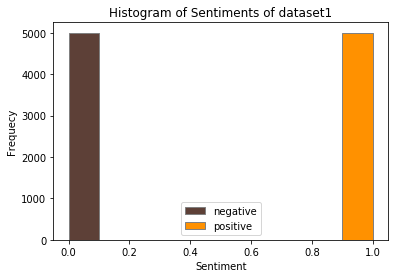

In [7]:
plt.close()
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(data.Sentiment.as_matrix(), edgecolor='gray')

# Set plot title
ax.set_title("Histogram of Sentiments of dataset1")

# Set x-axis name
ax.set_xlabel("Sentiment")

# Set y-axis name
ax.set_ylabel("Frequecy")

# Select the first patch (a rectangle, object of class matplotlib.patches.Patch)
# corresponding to negative sentiment and color it
patches[0].set_facecolor("#5d4037")
patches[0].set_label("negative")

# Same for the positive sentiment but in another color.
patches[-1].set_facecolor("#ff9100")
patches[-1].set_label("positive")

# Add legend to a plot     
plt.legend()

In [8]:
# This was our first balanced dataset that was edited and used as a sample from the Sentiment140 dataset


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


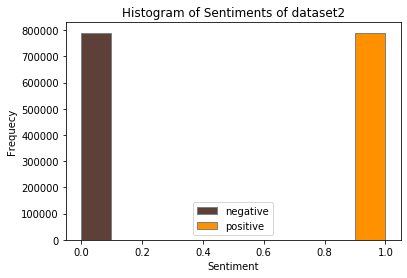

In [9]:
plt.close()
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(data2.Sentiment.as_matrix(), edgecolor='gray')

# Set plot title
ax.set_title("Histogram of Sentiments of dataset2")

# Set x-axis name
ax.set_xlabel("Sentiment")

# Set y-axis name
ax.set_ylabel("Frequecy")

# Select the first patch (a rectangle, object of class matplotlib.patches.Patch)
# corresponding to negative sentiment and color it
patches[0].set_facecolor("#5d4037")
patches[0].set_label("negative")

# Same for the positive sentiment but in another color.
patches[-1].set_facecolor("#ff9100")
patches[-1].set_label("positive")

# Add legend to a plot     
plt.legend()

In [10]:
# The second dataset also seems to be really well-balanced between negative and positive sentiment, let's confirm that by displying numeric values,

In [11]:
# Dataset 1
data.Sentiment.value_counts()
# Count of tweets corresponding to the positive and negative sentiments

1    5000
0    5000
Name: Sentiment, dtype: int64

In [12]:
# Dataset 2
data2.Sentiment.value_counts()
# Count of tweets corresponding to the positive and negative sentiments

1    790177
0    788435
Name: Sentiment, dtype: int64

In [13]:
#It is important to check if we have duplicates in tweets which is something that arise very often because of the RT (Retweet),
# Show duplicated tweets if exist in Dataset1
len(data[data.duplicated('SentimentText')])

0

In [14]:
# Show duplicated tweets if exist in Dataset 2
len(data2[data2.duplicated('SentimentText')])

0

In [15]:
# Display the number of RT in the first dataset
CountofRT = data['SentimentText'].str.contains('RT').value_counts()
CountofRT

False    10000
Name: SentimentText, dtype: int64

In [16]:
# Display the number of RT in the second dataset
CountofRT2 = data2['SentimentText'].str.contains('RT').value_counts()
CountofRT2

False    1578599
True          13
Name: SentimentText, dtype: int64

In [17]:
# Thats a very good news to have some retweets in our dataset but with zero duplications and thats a very 
# good thing when it comes to training our classifier

In [18]:
# Resources

# To have a good preprocessing to our data, we will be using some beneficial resources

# emoticon dictionary regrouping 132 of the most used emoticons in western with their sentiment, negative or positive.
# An acronym dictionary of 5465 acronyms with their translation
# A stop word dictionary corresponding to words which are filtered out before or after processing of natural language data because they are not useful in our case.
# A positive and negative word dictionaries.
# A negative contractions and auxiliaries dictionary which will be used to detect negation in a given tweet

In [19]:
# Load Smileys Dataset
emoticons = pd.read_csv(r'C:\Users\USER\Desktop\BE_datasets\Smileys.csv', skiprows=0, low_memory=False)
positive_emoticons = emoticons[emoticons.Sentiment == 1]
negative_emoticons = emoticons[emoticons.Sentiment == 0]
emoticons.head(5)

,Smiley,Sentiment
0,:-),1
1,:),1
2,:D,1
3,:o),1
4,:],1


In [20]:
# Load Acronyms Dataset
acronyms = pd.read_csv(r'C:\Users\USER\Desktop\BE_datasets\Acronyms.csv', skiprows=0, low_memory=False)
acronyms.tail(5)

,Acronym,Translation
5459,tomoz,tomorrow
5460,gpytfaht,gladly pay you tuesday for a hamburger today
5461,l8rz,later
5462,sase,self addressed stamped envelope
5463,bwoc,big woman on campus


In [21]:
# Load Stopwords Dataset
stops = pd.read_csv(r'C:\Users\USER\Desktop\BE_datasets\Stopwords.csv', skiprows=0, low_memory=False)
stops.columns = ['Word']
stops.head(5)

,Word
0,able
1,about
2,above
3,abroad
4,according


In [22]:
# The resources showed above are mainly used only for the preprocessing part. 


# Another resource that we are going to use is a lexicon which corresponds to a list of words where each word is associated with its polarity, positive or negative.
# The lexicon is divided into two distinct files, one for positive words, containing 2005 entries and the other for negative words containing 4782 entries.

In [23]:
# Load Positive Words Dataset
positive_words = pd.read_csv(r'C:\Users\USER\Desktop\BE_datasets\Positive-words.csv', skiprows=0, low_memory=False ,sep='\t')
positive_words.columns = ['Word', 'Sentiment']
positive_words.tail(5)

,Word,Sentiment
2000,youthful,1
2001,zeal,1
2002,zenith,1
2003,zest,1
2004,zippy,1


In [24]:
# Load Negative Words Dataset
negative_words = pd.read_csv(r'C:\Users\USER\Desktop\BE_datasets\Negative-words.csv', skiprows=0, low_memory=False ,sep='\t',encoding= 'unicode_escape')
negative_words.columns = ['Word', 'Sentiment']
negative_words.head(5)

,Word,Sentiment
0,2-faces,0
1,abnormal,0
2,abolish,0
3,abominable,0
4,abominably,0


In [25]:
# Load Negations Dataset
negation_words = pd.read_csv(r'C:\Users\USER\Desktop\BE_datasets\Negation.csv', skiprows=0, low_memory=False)
negation_words.head(5)

,Negation,Tag
0,not,||not||
1,don't,||not||
2,doesn't,||not||
3,aren't,||not||
4,isn't,||not||


In [26]:
# Preprocessing


# One of the most important parts that is going to be crucial for the learning part is the preprocessing of the data. Indeed as they are, we can't just use a learning algorithm because the given result would be highly biased due to the inconsistency of the data.

# To do this we are going to pass our data through these different steps:

# 1) Replace all emoticons by their sentiment polarity ||pos||/||neg|| using the emoticon dictionary.
# 2) Replace all URLs with a tag ||url||.
# 3) Remove Unicode characters.
# 4) Decode HTML entities.
# 5) Reduce all letters to lowercase (We should take care of proper nouns but for simplicity we will lower them as well) (After emoticons because they can use upper case letters)
# 6) Replace all usernames/targets @ with ||target||.
# 7) Replace all acronyms with their translation.
# 8) Replace all negations (e.g: not, no, never) by tag ||not||.
# 9) Replace a sequence of repeated characters by two characters (e.g: "helloooo" = "helloo") to keep the emphasized usage of the word.

# Not to forget the imporatnce of the tagging and lexicons phases inside the preprocessing we are doing here.
# In addition, those two are extremely important in terms of NLP and Sentiment Analysis.


# All these techniques will help us reach better results in the validation and testing phases.


In [27]:
import re # Regular Expressions

# Creating the functions to detect and replace emoticons for the first dataset

def make_emoticon_pattern(emoticons):
    pattern = "|".join(map(re.escape, emoticons.Smiley))
    pattern = "(?<=\s)(" + pattern + ")(?=\s)"
    return pattern

def find_with_pattern(pattern, replace=False, tag=None):
    if replace and tag == None:
        raise Exception("Parameter error", "If replace=True you should add the tag by which the pattern will be replaced")
    regex = re.compile(pattern)
    if replace:
        return data.SentimentText.apply(lambda tweet: re.sub(pattern, tag, " " + tweet + " "))
    return data.SentimentText.apply(lambda tweet: re.findall(pattern, " " + tweet + " "))

# Applying the functions by relying on the positive and negative emoticons retrieved from the resources
pos_emoticons_found = find_with_pattern(make_emoticon_pattern(positive_emoticons))
neg_emoticons_found = find_with_pattern(make_emoticon_pattern(negative_emoticons))

# Searching through the dataset to find the number of positive and negative emoticons presented
nb_pos_emoticons = len(pos_emoticons_found[pos_emoticons_found.map(lambda emoticons : len(emoticons) > 0)])
nb_neg_emoticons = len(neg_emoticons_found[neg_emoticons_found.map(lambda emoticons : len(emoticons) > 0)])
print ("Number of positive emoticons in the first dataset: " + str(nb_pos_emoticons))
print("Number of negative emoticons in the first dataset: " + str(nb_neg_emoticons))

Number of positive emoticons in the first dataset: 196
Number of negative emoticons in the first dataset: 100


In [28]:
# Performing the replacement function to the first dataset
data.SentimentText = find_with_pattern(make_emoticon_pattern(positive_emoticons), True, '||pos||')
data.SentimentText = find_with_pattern(make_emoticon_pattern(negative_emoticons), True, '||neg||')

In [29]:
# Same procedure for the second dataset
def make_emoticon_pattern2(emoticons):
    pattern = "|".join(map(re.escape, emoticons.Smiley))
    pattern = "(?<=\s)(" + pattern + ")(?=\s)"
    return pattern

def find_with_pattern2(pattern, replace=False, tag=None):
    if replace and tag == None:
        raise Exception("Parameter error", "If replace=True you should add the tag by which the pattern will be replaced")
    regex = re.compile(pattern)
    if replace:
        return data2.SentimentText.apply(lambda tweet: re.sub(pattern, tag, " " + tweet + " "))
    return data2.SentimentText.apply(lambda tweet: re.findall(pattern, " " + tweet + " "))

pos_emoticons_found = find_with_pattern2(make_emoticon_pattern2(positive_emoticons))
neg_emoticons_found = find_with_pattern2(make_emoticon_pattern2(negative_emoticons))

nb_pos_emoticons = len(pos_emoticons_found[pos_emoticons_found.map(lambda emoticons : len(emoticons) > 0)])
nb_neg_emoticons = len(neg_emoticons_found[neg_emoticons_found.map(lambda emoticons : len(emoticons) > 0)])
print ("Number of positive emoticons in the second dataset: " + str(nb_pos_emoticons))
print("Number of negative emoticons in the second dataset: " + str(nb_neg_emoticons))

Number of positive emoticons in the second dataset: 19469
Number of negative emoticons in the second dataset: 11025


In [30]:
# Performing the replacement function to the second dataset


data2.SentimentText = find_with_pattern2(make_emoticon_pattern2(positive_emoticons), True, '||pos||')
data2.SentimentText = find_with_pattern2(make_emoticon_pattern2(negative_emoticons), True, '||neg||')
data2.head(10)

,Sentiment,SentimentText
0,0,is so sad for my APL friend.............
1,0,I missed the New Moon trailer...
2,1,omg its already 7:30 ||pos||
3,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...
4,0,i think mi bf is cheating on me!!! ||neg||
5,0,or i just worry too much?
6,1,Juuuuuuuuuuuuuuuuussssst Chillin!!
7,0,Sunny Again Work Tomorrow ||neg|| TV Tonight
8,1,handed in my uniform today . i miss you already
9,1,hmmmm.... i wonder how she my number ||pos||


In [31]:
# Replacing the URLS


# Using the same method as for emoticons, we find all urls in each tweet and replace them by the tag ||url||

In [32]:
# Printing URLS

# First Dataset 
pattern_url = re.compile(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?\xab\xbb\u201c\u201d\u2018\u2019]))')
url_found = find_with_pattern(pattern_url)
print ("Number of urls of the first dataset: " + str(len(url_found[url_found.map(lambda urls : len(urls) > 0)])))

Number of urls of the first dataset: 251


In [33]:
# Second Dataset
pattern_url2 = re.compile(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?\xab\xbb\u201c\u201d\u2018\u2019]))')
url_found2 = find_with_pattern2(pattern_url2)
print ("Number of urls of the second dataset: " + str(len(url_found2[url_found2.map(lambda urls : len(urls) > 0)])))

Number of urls of the second dataset: 73824


In [34]:
# Some URL Examples before preprocessing
data2[50:60]

,Sentiment,SentimentText
50,0,baddest day eveer.
51,1,bathroom is clean..... now on to more enjoyable tasks......
52,1,boom boom pow
53,0,but i'm proud.
54,0,congrats to helio though
55,0,David must be hospitalized for five days end of July (palatine tonsils). I will probably never see Katie in concert.
56,0,friends are leaving me 'cause of this stupid love http://bit.ly/ZoxZC
57,1,go give ur mom a hug right now. http://bit.ly/azFwv
58,1,Going To See Harry Sunday Happiness
59,0,Hand quilting it is then...


In [35]:
# Replacing all URLS with ||url|| Expression for both datasets
data.SentimentText = find_with_pattern(pattern_url, True, '||url||')
data2.SentimentText = find_with_pattern2(pattern_url2, True, '||url||')
# URLS after preprocessing
data2[50:60]

,Sentiment,SentimentText
50,0,baddest day eveer.
51,1,bathroom is clean..... now on to more enjoyable tasks......
52,1,boom boom pow
53,0,but i'm proud.
54,0,congrats to helio though
55,0,David must be hospitalized for five days end of July (palatine tonsils). I will probably never see Katie in concert.
56,0,friends are leaving me 'cause of this stupid love ||url||
57,1,go give ur mom a hug right now. ||url||
58,1,Going To See Harry Sunday Happiness
59,0,Hand quilting it is then...


In [36]:
# We remove unicode characteres since they can cause problems during the tokenization process. We keep only ASCII characteres.


# Some examples of unicode character before preprocessing of dataset2
data2[1578592:1578602]

,Sentiment,SentimentText
1578592,1,'Zu SpÃ¤t' by Die Ã„rzte. One of the best bands ever
1578593,1,Zuma bitch tomorrow. Have a wonderful night everyone goodnight.
1578594,0,zummie's couch tour was amazing....to bad i had to leave early
1578595,0,"ZuneHD looks great! OLED screen @720p, HDMI, only issue is that I have an iPhone and 2 iPods . MAKE IT A PHONE and ill buy it @micro..."
1578596,1,zup there ! learning a new magic trick
1578597,1,zyklonic showers *evil*
1578598,1,ZZ Top â€“ I Thank You ...@hawaiibuzz .....Thanks for your music and for your ear(s) ...ALL !!!! Have a fab... â™« ||url||
1578599,0,zzz time. Just wish my love could B nxt 2 me
1578600,1,zzz twitter. good day today. got a lot accomplished. imstorm. got into it w yet another girl. dress shopping tmrw
1578601,1,"zzz's time, goodnight. ||url||"


In [37]:
# Remove Unicode characters keeping asci


# If you are using python 3 you should use both functions
def remove_unicode(text):
    try:
        text = text.encode('ascii','ignore')
    except UnicodeDecodeError:
        pass
    return text

def remove_unicode2(text):
    try:
        text = text.decode('unicode_escape')
    except UnicodeDecodeError:
        pass
    return text

# Removing unicode character of both datasets
data.SentimentText = data.SentimentText.apply(lambda tweet: remove_unicode(tweet))
data2.SentimentText = data2.SentimentText.apply(lambda tweet: remove_unicode(tweet))
data.SentimentText = data.SentimentText.apply(lambda tweet: remove_unicode2(tweet))
data2.SentimentText = data2.SentimentText.apply(lambda tweet: remove_unicode2(tweet))
# After removing Unicode characters
data2[1578592:1578602]

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: invalid escape sequence '\o'
  
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: invalid escape sequence '\ '
  
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: invalid escape sequence '\_'
  
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: invalid escape sequence '\.'
  
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: invalid escape sequence '\w'
  
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: invalid escape sequence '\?'
  
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: invalid escape sequence '\m'
  
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: invalid escape sequence '\y'
  
C:\Users\USER\Anaconda3\lib\site-package

,Sentiment,SentimentText
1578592,1,'Zu Spt' by Die rzte. One of the best bands ever
1578593,1,Zuma bitch tomorrow. Have a wonderful night everyone goodnight.
1578594,0,zummie's couch tour was amazing....to bad i had to leave early
1578595,0,"ZuneHD looks great! OLED screen @720p, HDMI, only issue is that I have an iPhone and 2 iPods . MAKE IT A PHONE and ill buy it @micro..."
1578596,1,zup there ! learning a new magic trick
1578597,1,zyklonic showers *evil*
1578598,1,ZZ Top I Thank You ...@hawaiibuzz .....Thanks for your music and for your ear(s) ...ALL !!!! Have a fab... ||url||
1578599,0,zzz time. Just wish my love could B nxt 2 me
1578600,1,zzz twitter. good day today. got a lot accomplished. imstorm. got into it w yet another girl. dress shopping tmrw
1578601,1,"zzz's time, goodnight. ||url||"


In [38]:
# Before Decoding HTML entities
data2.SentimentText[599982]

'   Cannot get chatroom feature to work.   Updated Java to 10, checked ports, etc. I can see video, but in the &quot;chat,&quot; only a spinning circle.   '

In [39]:
# Simply decode HTML entities
import html
# Convert tweets in unicode utf-8 to avoid mixing unicode with ascii and causing an error during unescape
data.SentimentText  = data.SentimentText.apply(lambda tweet: html.unescape(str(tweet)))
data2.SentimentText  = data2.SentimentText.apply(lambda tweet: html.unescape(str(tweet)))
# After decoding HTML entities
data2.SentimentText[599982]

'   Cannot get chatroom feature to work.   Updated Java to 10, checked ports, etc. I can see video, but in the "chat," only a spinning circle.   '

In [40]:
# Reducing all letters to lower case 

#This is part is extremely simple, we just transform all tweets to lower case in order to make easier the next operations with the acronym and stop dictionaries and more generally, to make easier comparisons. We should take care of proper noun but for simplicity we skip this.

# Example before doing the lower case function
data2.head(10)


,Sentiment,SentimentText
0,0,is so sad for my APL friend.............
1,0,I missed the New Moon trailer...
2,1,omg its already 7:30 ||pos||
3,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...
4,0,i think mi bf is cheating on me!!! ||neg||
5,0,or i just worry too much?
6,1,Juuuuuuuuuuuuuuuuussssst Chillin!!
7,0,Sunny Again Work Tomorrow ||neg|| TV Tonight
8,1,handed in my uniform today . i miss you already
9,1,hmmmm.... i wonder how she my number ||pos||


In [41]:
# Reduce all letters to lower case
data.SentimentText = data.SentimentText.str.lower()
data2.SentimentText = data2.SentimentText.str.lower()

# After preprocessing of letters
data2.head(10)

,Sentiment,SentimentText
0,0,is so sad for my apl friend.............
1,0,i missed the new moon trailer...
2,1,omg its already 7:30 ||pos||
3,0,.. omgaga. im sooo im gunna cry. i've been at this dentist since 11.. i was suposed 2 just get a crown put on (30mins)...
4,0,i think mi bf is cheating on me!!! ||neg||
5,0,or i just worry too much?
6,1,juuuuuuuuuuuuuuuuussssst chillin!!
7,0,sunny again work tomorrow ||neg|| tv tonight
8,1,handed in my uniform today . i miss you already
9,1,hmmmm.... i wonder how she my number ||pos||


In [42]:
# Replacing all usernames @ with the tag ||target||


# Since we don't need to take into account usernames in order to determine the sentiment of a tweet we replace them by the tag ||target||.

# Before replacement
data2[45:55]


,Sentiment,SentimentText
45,1,@ginaaa <3 go to the show tonight
46,0,@spiral_galaxy @ymptweet it really makes me sad when i look at muslims reality now
47,0,- all time low shall be my motivation for the rest of the week.
48,0,"and the entertainment is over, someone complained properly.. @rupturerapture experimental you say? he should experiment with a me..."
49,0,another year of lakers .. that's neither magic nor fun ...
50,0,baddest day eveer.
51,1,bathroom is clean..... now on to more enjoyable tasks......
52,1,boom boom pow
53,0,but i'm proud.
54,0,congrats to helio though


In [43]:
# Now we want to check how many mentions we have in both datasets

# NLP expression that is related to all string values that are @ followed by any names or string values
pattern_usernames = "@\w{1,}"
usernames_found = find_with_pattern(pattern_usernames)
usernames_found2 = find_with_pattern2(pattern_usernames)

In [44]:
# Number of targets in the first dataset
len(data.SentimentText[usernames_found.apply(lambda usernames : len(usernames) > 0)])


10000

In [45]:
# Number of targets in the second dataset
len(data2.SentimentText[usernames_found2.apply(lambda usernames : len(usernames) > 0)])

735757

In [46]:
# Replace all usernames/targets @ with the tag ||target||
data.SentimentText = find_with_pattern(pattern_usernames, True, '||target||')
data2.SentimentText = find_with_pattern2(pattern_usernames, True, '||target||')

# Sample rows after replacement
data2[45:55]

,Sentiment,SentimentText
45,1,||target|| <3 go to the show tonight
46,0,||target|| ||target|| it really makes me sad when i look at muslims reality now
47,0,- all time low shall be my motivation for the rest of the week.
48,0,"and the entertainment is over, someone complained properly.. ||target|| experimental you say? he should experiment with a melody..."
49,0,another year of lakers .. that's neither magic nor fun ...
50,0,baddest day eveer.
51,1,bathroom is clean..... now on to more enjoyable tasks......
52,1,boom boom pow
53,0,but i'm proud.
54,0,congrats to helio though


In [47]:
#7) Replace all acronyms with their translation

#Next, we replace all acronyms with their translation using the acronym dictionary.
#At this point, tweets are going to be tokenized by getting rid of the punctuation and using split in order to do the process really fast. We could use nltk.tokenizer but it is definitly much much slower (also much more accurate but its not a severe problem).
#Even though replacements will not be perfect, a simple example is the acronym "im" meaning "instant message". It would not be surprising that in most of the cases, "im" means "I am". For that, some improvements will be done later on to enhance our results


In [48]:
from collections import Counter

# Create a dictionary of acronym which will be used to get translations
acronym_dictionary = dict(zip(acronyms.Acronym, acronyms.Translation))

# Will be used to get rid of the punctuation in tweets (does not include | since we use it for our tokens and ' 
# to take care of don't, can't)
punctuation = '!"#$%&()*+,-./:;<=>?@[\\]^_`{}~'

# Frequency table for acronyms
acronyms_counter = Counter()

# Loop on acronyms to replace those matched in the tweet by the corresponding translations
# Return the tweet and the acronyms used
def acronym_to_translation(tweet, acronyms_counter):
    table = str.maketrans(punctuation," " * len(punctuation))
    tweet = str(tweet).translate(table)
    words = tweet.split()
    new_words = []
    for i, word in enumerate(words):
        if acronym_dictionary.__contains__(word):
            acronyms_counter[word] += 1
            new_words.extend(acronym_dictionary[word].split())
        else:
            new_words.append(word)
    return new_words

data.SentimentText = data.SentimentText.apply(lambda tweet: acronym_to_translation(str(tweet), acronyms_counter))

# Get and display top20 acronyms of the first dataset
top20acronyms = acronyms_counter.most_common(20)
top20acronyms

[('lol', 648),
 ('u', 596),
 ('im', 355),
 ('2', 235),
 ('dont', 149),
 ('ok', 141),
 ('ur', 135),
 ('gonna', 135),
 ('wanna', 106),
 ('4', 95),
 ('ya', 79),
 ('omg', 71),
 ('r', 66),
 ('pic', 65),
 ('n', 64),
 ('tho', 58),
 ('lmao', 57),
 ('gotta', 47),
 ('yea', 46),
 ('soo', 43)]

In [49]:
# Same process for the second dataset

# Create a dictionary of acronym which will be used to get translations
acronym_dictionary = dict(zip(acronyms.Acronym, acronyms.Translation))

# Will be used to get rid of the punctuation in tweets (does not include | since we use it for our tokens and ' 
# to take care of don't, can't)
punctuation = '!"#$%&()*+,-./:;<=>?@[\\]^_`{}~'

# Frequency table for acronyms
acronyms_counter2 = Counter()

# Loop on acronyms to replace those matched in the tweet by the corresponding translations
# Return the tweet and the acronyms used
def acronym_to_translation2(tweet, acronyms_counter2):
    table = str.maketrans(punctuation," " * len(punctuation))
    tweet = str(tweet).translate(table)
    words = tweet.split()
    new_words = []
    for i, word in enumerate(words):
        if acronym_dictionary.__contains__(word):
            acronyms_counter2[word] += 1
            new_words.extend(acronym_dictionary[word].split())
        else:
            new_words.append(word)
    return new_words

data2.SentimentText = data2.SentimentText.apply(lambda tweet: acronym_to_translation2(str(tweet ), acronyms_counter2))

# Get and display top20 acronyms of the second dataset
top20acronyms2 = acronyms_counter2.most_common(20)
top20acronyms2

[('lol', 59000),
 ('u', 54557),
 ('im', 51099),
 ('2', 42645),
 ('gonna', 23716),
 ('4', 18610),
 ('dont', 18363),
 ('wanna', 16357),
 ('ok', 16104),
 ('ur', 12960),
 ('omg', 12178),
 ('n', 10415),
 ('ya', 9948),
 ('gotta', 9243),
 ('r', 8132),
 ('tho', 7696),
 ('tv', 6246),
 ('o', 6002),
 ('kinda', 5953),
 ('pic', 5945)]

In [50]:
# Just to better visualize the top 20 acronym
print("Dataset 1:")
for i, (acronym, value) in enumerate(top20acronyms):
    print (str(i + 1) + ") " + acronym + " => " + acronym_dictionary[acronym] + " : " + str(value) )

Dataset 1:
1) lol => laughing out loud : 648
2) u => you : 596
3) im => instant message : 355
4) 2 => too : 235
5) dont => don't : 149
6) ok => okay : 141
7) ur => your : 135
8) gonna => going to : 135
9) wanna => want to : 106
10) 4 => for : 95
11) ya => yeah : 79
12) omg => oh my god : 71
13) r => are : 66
14) pic => picture : 65
15) n => and : 64
16) tho => though : 58
17) lmao => laughing my ass off : 57
18) gotta => got to : 47
19) yea => yeah : 46
20) soo => so : 43


In [51]:
# Just to better visualize the top 20 acronym
print('Dataset 2:')
for i, (acronym, value) in enumerate(top20acronyms2):
    print (str(i + 1) + ") " + acronym + " => " + acronym_dictionary[acronym] + " : " + str(value) )

Dataset 2:
1) lol => laughing out loud : 59000
2) u => you : 54557
3) im => instant message : 51099
4) 2 => too : 42645
5) gonna => going to : 23716
6) 4 => for : 18610
7) dont => don't : 18363
8) wanna => want to : 16357
9) ok => okay : 16104
10) ur => your : 12960
11) omg => oh my god : 12178
12) n => and : 10415
13) ya => yeah : 9948
14) gotta => got to : 9243
15) r => are : 8132
16) tho => though : 7696
17) tv => television : 6246
18) o => oh : 6002
19) kinda => kind of : 5953
20) pic => picture : 5945


([<matplotlib.axis.XTick at 0x2207bec3548>,
 <a list of 20 Text xticklabel objects>)

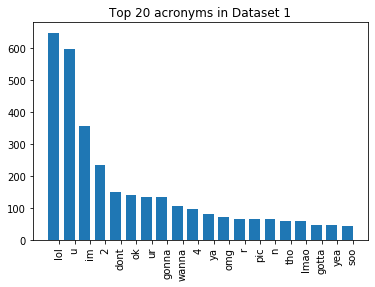

In [52]:
# With a bar plot
plt.close()
top20acronym_keys = [x[0] for x in top20acronyms]
top20acronym_values = [x[1] for x in top20acronyms]
indexes = np.arange(len(top20acronym_keys))
width = 0.7
plt.bar(indexes, top20acronym_values, width)
plt.title('Top 20 acronyms in Dataset 1')
plt.xticks(indexes + width * 0.5, top20acronym_keys, rotation="vertical")

([<matplotlib.axis.XTick at 0x2207c2b2888>,
 <a list of 20 Text xticklabel objects>)

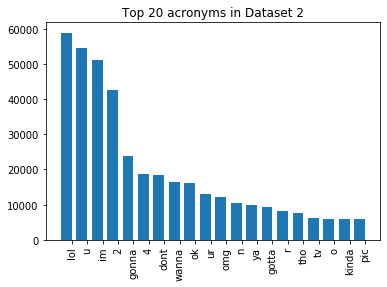

In [53]:
# With a bar plot
plt.close()
top20acronym_keys2 = [x[0] for x in top20acronyms2]
top20acronym_values2 = [x[1] for x in top20acronyms2]
indexes = np.arange(len(top20acronym_keys2))
width = 0.7
plt.bar(indexes, top20acronym_values2, width)
plt.title('Top 20 acronyms in Dataset 2')
plt.xticks(indexes + width * 0.5, top20acronym_keys2, rotation="vertical")

In [54]:
# Replace all negations by tag ||not||

#We replace all negations such as not, no, don't and so on, using the negation dictionary in order to take more or less of sentences like "I don't like it". Here like should not be considered as positive because of the "don't" before. To do so we will replace "don't" by ||not|| and the word like will not be counted as positive.
#In general, each time a negation is encountered, the words followed by the negation word contained in the positive and negative word dictionaries will be reversed, positive becomes negative, negative becomes positive, we will do this when we will try to find positive and negative words..
# Since we replaced the negations and the positive and negative words, the tagging will reduce the harm due to the combination of both

# Before replacement
print (data2.SentimentText[29])

['i', "didn't", 'realize', 'it', 'was', 'that', 'deep', 'geez', 'give', 'a', 'girl', 'a', 'warning', 'atleast']


In [55]:
# Transform the dataframe into a dictionary
negation_dictionary = dict(zip(negation_words.Negation, negation_words.Tag))

# Find a negation in a tweet and replace it by its tag
def replace_negation(tweet):
    return [negation_dictionary[word] if negation_dictionary.__contains__(word) else word for word in tweet]
    
# Apply the function on every tweet
data.SentimentText = data.SentimentText.apply(lambda tweet: replace_negation(tweet))
data2.SentimentText = data2.SentimentText.apply(lambda tweet: replace_negation(tweet))
# After replacement
print (data2.SentimentText[29])

['i', '||not||', 'realize', 'it', 'was', 'that', 'deep', 'geez', 'give', 'a', 'girl', 'a', 'warning', 'atleast']


In [56]:
#Replace a sequence of repeated characters by two caracters

#There are many words containing repeated sequences of charaters usually used to emphasize a word.
#We are going to reduce the number of repeated charaters in order to potentially reduce the feature space (the words in our case) and keep their emphasized aspect

# Sample data before removing repeated characters
data2[1578604:]

,Sentiment,SentimentText
1578604,1,"[zzzz, no, work, tomorrow, yayyy]"
1578605,1,"[zzzzz, time, tomorrow, will, be, a, busy, day, for, serving, loving, people, love, you, all]"
1578606,0,"[zzzzz, want, to, sleep, but, at, sister's, in, laws's, house]"
1578607,1,"[zzzzzz, finally, night, tweeters]"
1578608,1,"[zzzzzzz, sleep, well, people]"
1578609,0,"[zzzzzzzzzz, wait, no, i, have, homework]"
1578610,0,"[zzzzzzzzzzzzz, whatever, what, am, i, doing, up, again]"
1578611,0,"[zzzzzzzzzzzzzzzzzzz, i, wish]"


In [57]:
#Replace a sequence of repeated characters by two characters

# We use the corresponding regular expression to detected repeated characters inside a word
pattern = re.compile(r'(.)\1*')

def reduce_sequence_word(word):
    return ''.join([match.group()[:2] if len(match.group()) > 2 else match.group() for match in pattern.finditer(word)])

def reduce_sequence_tweet(tweet):
    return [reduce_sequence_word(word) for word in tweet]

# Applying the replacements functions to both datasets
data.SentimentText = data.SentimentText.apply(lambda tweet: reduce_sequence_tweet(tweet))
data2.SentimentText = data2.SentimentText.apply(lambda tweet: reduce_sequence_tweet(tweet))

# After removing repeated characters
data2[1578604:]

,Sentiment,SentimentText
1578604,1,"[zz, no, work, tomorrow, yayy]"
1578605,1,"[zz, time, tomorrow, will, be, a, busy, day, for, serving, loving, people, love, you, all]"
1578606,0,"[zz, want, to, sleep, but, at, sister's, in, laws's, house]"
1578607,1,"[zz, finally, night, tweeters]"
1578608,1,"[zz, sleep, well, people]"
1578609,0,"[zz, wait, no, i, have, homework]"
1578610,0,"[zz, whatever, what, am, i, doing, up, again]"
1578611,0,"[zz, i, wish]"


In [58]:
#First Dataset
def make_training_test_sets(data):
    
    # Before making the training and test set, we shuffle our data set in order to avoid keeping any order
    data_shuffled = data.iloc[np.random.permutation(len(data))]
    data = data_shuffled.reset_index(drop=True)

    # Join the words back into one string separated by space for each tweet
    data.SentimentText = data.SentimentText.apply(lambda tweet: " ".join(tweet))

    # Separate positive and negative tweets
    positive_tweets = data[data.Sentiment == 1]
    negative_tweets = data[data.Sentiment == 0]

    # Cutoff, 9/10 for training of each sentiment and 1/10 of each sentiment for testing
    positive_tweets_cutoff = int(len(positive_tweets) * (9./10.))
    negative_tweets_cutoff = int(len(negative_tweets) * (9./10.))

    # Make the training and test set
    training_tweets = pd.concat([positive_tweets[:positive_tweets_cutoff], negative_tweets[:negative_tweets_cutoff]])
    test_tweets = pd.concat([positive_tweets[positive_tweets_cutoff:], negative_tweets[negative_tweets_cutoff:]])

    # We suffle the training and test set to break the order of tweets based on their sentiment
    training_tweets = training_tweets.iloc[np.random.permutation(len(training_tweets))].reset_index(drop=True)
    test_tweets = test_tweets.iloc[np.random.permutation(len(test_tweets))].reset_index(drop=True)
    
    return training_tweets, test_tweets

training_tweets, test_tweets = make_training_test_sets(data)

print ("size of training set of first dataset: " + str(len(training_tweets)))
print ("size of test set of first dataset: " + str(len(test_tweets)))

size of training set of first dataset: 9000
size of test set of first dataset: 1000


In [59]:
# Second Dataset
def make_training_test_sets2(data2):
    
    # Before making the training and test set, we shuffle our data set in order to avoid keeping any order
    data_shuffled2 = data2.iloc[np.random.permutation(len(data2))]
    data2 =  data_shuffled2.reset_index(drop=True)

    # Join the words back into one string separated by space for each tweet
    data2.SentimentText = data2.SentimentText.apply(lambda tweet: " ".join(tweet))

    # Separate positive and negative tweets
    positive_tweets = data2[data2.Sentiment == 1]
    negative_tweets = data2[data2.Sentiment == 0]

    # Cutoff, 3/4 for training of each sentiment and 1/4 of each sentiment for testing
    positive_tweets_cutoff = int(len(positive_tweets) * (3./4.))
    negative_tweets_cutoff = int(len(negative_tweets) * (3./4.))

    # Make the training and test set
    training_tweets2 = pd.concat([positive_tweets[:positive_tweets_cutoff], negative_tweets[:negative_tweets_cutoff]])
    test_tweets2 = pd.concat([positive_tweets[positive_tweets_cutoff:], negative_tweets[negative_tweets_cutoff:]])

    # We suffle the training and test set to break the order of tweets based on their sentiment
    training_tweets2 = training_tweets2.iloc[np.random.permutation(len(training_tweets2))].reset_index(drop=True)
    test_tweets2 = test_tweets2.iloc[np.random.permutation(len(test_tweets2))].reset_index(drop=True)
    
    return training_tweets2, test_tweets2

training_tweets2, test_tweets2 = make_training_test_sets2(data2)

print ("size of training set of second dataset: " + str(len(training_tweets2)))
print ("size of test set of second dataset: " + str(len(test_tweets2)))

size of training set of second dataset: 1183958
size of test set of second dataset: 394654


In [60]:
# Now we will start training and validating the data of dataset1 unigram

# We will use Sklearn for kfolding, calculating the metrics: precision, accuracy, recall, f1 score and confusion matrix
# We will be using the famous classification algorithms Multinomial Naive Bayes, KNeighbor, SGD, Logistic regression, Decision tree, and SVM
# we import pickle to save the models as a pickle file, to be used later on for testing
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pickle

# Starting with dataset one we will perform all the algorithms before removing stop words and before stemming, and using unigrams only
def classify_unigram(training_tweets, test_tweets, ngram=(1, 1)):
    global models
    models = []
    models.append(('Multi_uni_before_ss', MultinomialNB()))
    models.append(('DT_uni_before_ss', DecisionTreeClassifier()))
    models.append(('KN_uni_before_ss', KNeighborsClassifier()))
    models.append(('SGD_uni_before_ss', SGDClassifier()))
    models.append(('SVM_uni_before_ss', SVC()))
    models.append(('LR_uni_before_ss', LogisticRegression(solver='lbfgs')))
    results= []
    names= []
    # F1 scores for each fold
    global scores
    scores = []
    
        
    # Provides train/test indices to split data in train, validation sets.
    k_fold = KFold(n_splits=10, shuffle = True)

    # Used to convert a collection of text docuements to a matrix of token counts => Bag of words
    count_vectorizer = CountVectorizer(ngram_range=ngram)

    # Confusion matrix with TP/FP/TN/FN
    confusion = np.array([[0, 0], [0, 0]])
    for name,model in models:
        print(name)
        score2=0
        for training_indices, validation_indices in k_fold.split(training_tweets):
                
                training_features = count_vectorizer.fit_transform(training_tweets.iloc[training_indices]['SentimentText'].values)
                training_labels = training_tweets.iloc[training_indices]['Sentiment'].values

                validation_features = count_vectorizer.transform(training_tweets.iloc[validation_indices]['SentimentText'].values)
                validation_labels = training_tweets.iloc[validation_indices]['Sentiment'].values

                classifier = model
                classifier.fit(training_features, training_labels)
                validation_predictions = classifier.predict(validation_features)

                confusion += confusion_matrix(validation_labels, validation_predictions)
                score = f1_score(validation_labels, validation_predictions)
                precision=precision_score(validation_labels, validation_predictions)
                recall=recall_score(validation_labels,validation_predictions)
                accuracy=accuracy_score(validation_labels, validation_predictions)
                scores.append(score)
                # Save to file in the current working directory as a pkl file to be used later in testing
                pkl_filename = "C:/Users/USER/Desktop/BE/Models/"+name+".pkl"
                # if loop to store the fold with the best F1 score
                if score>score2:
                    with open(pkl_filename, 'wb') as file:
                        # saving the classifier with the countvectorizer function to be used later on
                        pickle.dump(classifier, file)
                        pickle.dump(count_vectorizer, file)
                    score2=score        
        print('\n')
        print ('Total tweets classified: ' + str(len(training_tweets)))
        print('\n')
        print ('F1 Score: ' +  (str(sum(scores)/len(scores)*100)+'%'))
        print ('Accuracy: ' + str(accuracy*100)+ '%')
        print ('Precision: ' + str(precision*100)+ '%')
        print ('Recall: ' + str(recall*100)+ '%')
        print('\n')
        print ('Confusion matrix:')
        print (confusion)
        print('\n')
        print('-------------------------------------')
        print('\n')
        

        
classify_unigram(training_tweets, test_tweets)

Multi_uni_before_ss


Total tweets classified: 9000


F1 Score: 70.6143338853768%
Accuracy: 71.33333333333334%
Precision: 71.01449275362319%
Recall: 68.05555555555556%


Confusion matrix:
[[3376 1124]
 [1429 3071]]


-------------------------------------


DT_uni_before_ss


Total tweets classified: 9000


F1 Score: 67.66637018603406%
Accuracy: 67.77777777777779%
Precision: 67.57990867579909%
Recall: 66.66666666666666%


Confusion matrix:
[[6370 2630]
 [3055 5945]]


-------------------------------------


KN_uni_before_ss


Total tweets classified: 9000


F1 Score: 66.68588748008813%
Accuracy: 62.22222222222222%
Precision: 64.2578125%
Recall: 67.6954732510288%


Confusion matrix:
[[8841 4659]
 [4430 9070]]


-------------------------------------


SGD_uni_before_ss


Total tweets classified: 9000


F1 Score: 67.89438201840403%
Accuracy: 72.11111111111111%
Precision: 72.66811279826464%
Recall: 72.82608695652173%


Confusion matrix:
[[11957  6043]
 [ 5652 12348]]


---------------------

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre



Total tweets classified: 9000


F1 Score: 69.67515755136418%
Accuracy: 72.44444444444444%
Precision: 70.12711864406779%
Recall: 75.57077625570776%


Confusion matrix:
[[18271  8729]
 [ 7899 19101]]


-------------------------------------




C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [61]:
# Same procedure for the second dataset using only Multi NB and unigrams
def classify_unigram2(training_tweets2, test_tweets2, ngram=(1, 1)):
    global models
    models = []
    models.append(('Multi_uni_before_ss2', MultinomialNB()))
    results= []
    names= []
    # F1 scores for each fold
    global scores
    scores = []
    
    #for name,model in models:
        
    # Provides train/test indices to split data in train, validation sets.
    k_fold = KFold(n_splits=10, shuffle = True)

    # Used to convert a collection of text docuements to a matrix of token counts => Bag of words
    count_vectorizer = CountVectorizer(ngram_range=ngram)

    # Confusion matrix with TP/FP/TN/FN
    confusion = np.array([[0, 0], [0, 0]])
    for name,model in models:
        print(name)
        score2=0
        for training_indices, validation_indices in k_fold.split(training_tweets2):
                
                training_features = count_vectorizer.fit_transform(training_tweets2.iloc[training_indices]['SentimentText'].values)
                training_labels = training_tweets2.iloc[training_indices]['Sentiment'].values

                validation_features = count_vectorizer.transform(training_tweets2.iloc[validation_indices]['SentimentText'].values)
                validation_labels = training_tweets2.iloc[validation_indices]['Sentiment'].values

                classifier = model
                classifier.fit(training_features, training_labels)
                validation_predictions = classifier.predict(validation_features)

                confusion += confusion_matrix(validation_labels, validation_predictions)
                score = f1_score(validation_labels, validation_predictions)
                precision=precision_score(validation_labels, validation_predictions)
                recall=recall_score(validation_labels,validation_predictions)
                accuracy=accuracy_score(validation_labels, validation_predictions)
                scores.append(score)
                # Save to file in the current working directory
                pkl_filename = "C:/Users/USER/Desktop/BE/Models/"+name+".pkl"
                if score>score2:
                    with open(pkl_filename, 'wb') as file:
                        pickle.dump(classifier, file)
                        pickle.dump(count_vectorizer, file)
                    score2=score
                    
                
        print('\n')
        print ('Total tweets classified: ' + str(len(training_tweets2)))
        print('\n')
        print ('F1 Score: ' +  (str(sum(scores)/len(scores)*100)+'%'))
        print ('Accuracy: ' + str(accuracy*100)+ '%')
        print ('Precision: ' + str(precision*100)+ '%')
        print ('Recall: ' + str(recall*100)+ '%')
        print('\n')
        print ('Confusion matrix:')
        print (confusion)
        print('\n')
        print('-------------------------------------')
        print('\n')
        
classify_unigram2(training_tweets2, test_tweets2)

Multi_uni_before_ss2


Total tweets classified: 1183958


F1 Score: 77.69753645635885%
Accuracy: 77.74568182777989%
Precision: 78.29830206764343%
Recall: 76.9936378631299%


Confusion matrix:
[[465029 126297]
 [135903 456729]]


-------------------------------------




In [62]:
# Now its unigrams and bigrams of dataset1
def classify_unigrambigram(training_tweets, test_tweets, ngram=(1, 2)):
    global models
    models = []
    models.append(('Multi_unibi_before_ss', MultinomialNB()))
    models.append(('DT_unibi_before_ss', DecisionTreeClassifier()))
    models.append(('KN_unibi_before_ss', KNeighborsClassifier()))
    models.append(('SGD_unibi_before_ss', SGDClassifier()))
    models.append(('SVM_unibi_before_ss', SVC()))
    models.append(('LR_unibi_before_ss', LogisticRegression(solver='lbfgs')))
    results= []
    names= []
    # F1 scores for each fold
    global scores
    scores = []
    
    #for name,model in models:
        
    # Provides train/test indices to split data in train, validation sets.
    k_fold = KFold(n_splits=10, shuffle = True)

    # Used to convert a collection of text docuements to a matrix of token counts => Bag of words
    count_vectorizer = CountVectorizer(ngram_range=ngram)

    # Confusion matrix with TP/FP/TN/FN
    confusion = np.array([[0, 0], [0, 0]])
    for name,model in models:
        print(name)
        score2=0
        for training_indices, validation_indices in k_fold.split(training_tweets):
                
                training_features = count_vectorizer.fit_transform(training_tweets.iloc[training_indices]['SentimentText'].values)
                training_labels = training_tweets.iloc[training_indices]['Sentiment'].values

                validation_features = count_vectorizer.transform(training_tweets.iloc[validation_indices]['SentimentText'].values)
                validation_labels = training_tweets.iloc[validation_indices]['Sentiment'].values

                classifier = model
                classifier.fit(training_features, training_labels)
                validation_predictions = classifier.predict(validation_features)

                confusion += confusion_matrix(validation_labels, validation_predictions)
                score = f1_score(validation_labels, validation_predictions)
                precision=precision_score(validation_labels, validation_predictions)
                recall=recall_score(validation_labels,validation_predictions)
                accuracy=accuracy_score(validation_labels, validation_predictions)
                scores.append(score)
                # Save to file in the current working directory
                pkl_filename = "C:/Users/USER/Desktop/BE/Models/"+name+".pkl"
                if score>score2:
                    with open(pkl_filename, 'wb') as file:
                        pickle.dump(classifier, file)
                        pickle.dump(count_vectorizer, file)
                    score2=score
                
               
        print('\n')
        print ('Total tweets classified: ' + str(len(training_tweets)))
        print('\n')
        print ('F1 Score: ' +  (str(sum(scores)/len(scores)*100)+'%'))
        print ('Accuracy: ' + str(accuracy*100)+ '%')
        print ('Precision: ' + str(precision*100)+ '%')
        print ('Recall: ' + str(recall*100)+ '%')
        print('\n')
        print ('Confusion matrix:')
        print (confusion)
        print('\n')
        print('-------------------------------------')
        print('\n')

        
classify_unigrambigram(training_tweets, test_tweets)

Multi_unibi_before_ss


Total tweets classified: 9000


F1 Score: 70.93127136687008%
Accuracy: 71.22222222222221%
Precision: 76.5281173594132%
Recall: 65.75630252100841%


Confusion matrix:
[[3495 1005]
 [1474 3026]]


-------------------------------------


DT_unibi_before_ss


Total tweets classified: 9000


F1 Score: 68.42614349192118%
Accuracy: 64.66666666666666%
Precision: 67.3289183222958%
Recall: 64.21052631578948%


Confusion matrix:
[[6484 2516]
 [3018 5982]]


-------------------------------------


KN_unibi_before_ss


Total tweets classified: 9000


F1 Score: 65.81570472447241%
Accuracy: 59.44444444444444%
Precision: 59.43204868154158%
Recall: 63.97379912663755%


Confusion matrix:
[[9032 4468]
 [4707 8793]]


-------------------------------------


SGD_unibi_before_ss


Total tweets classified: 9000


F1 Score: 67.50197618300507%
Accuracy: 72.88888888888889%
Precision: 70.020964360587%
Recall: 76.7816091954023%


Confusion matrix:
[[12126  5874]
 [ 5840 12160]]


---------

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre



Total tweets classified: 9000


F1 Score: 69.66814103456065%
Accuracy: 76.22222222222223%
Precision: 76.27906976744187%
Recall: 74.54545454545455%


Confusion matrix:
[[18403  8597]
 [ 7952 19048]]


-------------------------------------




C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [63]:
# Unigram and bigram usage for dataset2 
def classify_unigrambigram2(training_tweets2, test_tweets2, ngram=(1, 2)):
    global models
    models = []
    models.append(('Multi_unibi_before_ss2', MultinomialNB()))
    results= []
    names= []
    # F1 scores for each fold
    global scores
    scores = []
    
    #for name,model in models:
        
    # Provides train/test indices to split data in train, validation sets.
    k_fold = KFold(n_splits=10, shuffle = True)

    # Used to convert a collection of text docuements to a matrix of token counts => Bag of words
    count_vectorizer = CountVectorizer(ngram_range=ngram)

    # Confusion matrix with TP/FP/TN/FN
    confusion = np.array([[0, 0], [0, 0]])
    for name,model in models:
        print(name)
        score2=0
        for training_indices, validation_indices in k_fold.split(training_tweets2):
                
                training_features = count_vectorizer.fit_transform(training_tweets2.iloc[training_indices]['SentimentText'].values)
                training_labels = training_tweets2.iloc[training_indices]['Sentiment'].values

                validation_features = count_vectorizer.transform(training_tweets2.iloc[validation_indices]['SentimentText'].values)
                validation_labels = training_tweets2.iloc[validation_indices]['Sentiment'].values

                classifier = model
                classifier.fit(training_features, training_labels)
                validation_predictions = classifier.predict(validation_features)

                confusion += confusion_matrix(validation_labels, validation_predictions)
                score = f1_score(validation_labels, validation_predictions)
                precision=precision_score(validation_labels, validation_predictions)
                recall=recall_score(validation_labels,validation_predictions)
                accuracy=accuracy_score(validation_labels, validation_predictions)
                scores.append(score)
                # Save to file in the current working directory
                pkl_filename = "C:/Users/USER/Desktop/BE/Models/"+name+".pkl"
                if score>score2:
                    with open(pkl_filename, 'wb') as file:
                        pickle.dump(classifier, file)
                        pickle.dump(count_vectorizer, file)
                    score2=score
                    
                
        print('\n')
        print ('Total tweets classified: ' + str(len(training_tweets2)))
        print('\n')
        print ('F1 Score: ' +  (str(sum(scores)/len(scores)*100)+'%'))
        print ('Accuracy: ' + str(accuracy*100)+ '%')
        print ('Precision: ' + str(precision*100)+ '%')
        print ('Recall: ' + str(recall*100)+ '%')
        print('\n')
        print ('Confusion matrix:')
        print (confusion)
        print('\n')
        print('-------------------------------------')
        print('\n')
        
classify_unigrambigram2(training_tweets2, test_tweets2)

Multi_unibi_before_ss2


Total tweets classified: 1183958


F1 Score: 79.63432893516023%
Accuracy: 80.05827948815406%
Precision: 81.7500574397766%
Recall: 77.68857387594686%


Confusion matrix:
[[486614 104712]
 [131265 461367]]


-------------------------------------




In [64]:
# Using bigrams only for dataset1
def classify_bigram(training_tweets, test_tweets, ngram=(2, 2)):
    global models
    models = []
    models.append(('Multi_bi_before_ss', MultinomialNB()))
    models.append(('DT_bi_before_ss', DecisionTreeClassifier()))
    models.append(('KN_bi_before_ss', KNeighborsClassifier()))
    models.append(('SGD_bi_before_ss', SGDClassifier()))
    models.append(('SVM_bi_before_ss', SVC()))
    models.append(('LR_bi_before_ss', LogisticRegression(solver='lbfgs')))
    results= []
    names= []
    # F1 scores for each fold
    global scores
    scores = []
    
    #for name,model in models:
        
    # Provides train/test indices to split data in train, validation sets.
    k_fold = KFold(n_splits=10, shuffle = True)

    # Used to convert a collection of text docuements to a matrix of token counts => Bag of words
    count_vectorizer = CountVectorizer(ngram_range=ngram)

    # Confusion matrix with TP/FP/TN/FN
    confusion = np.array([[0, 0], [0, 0]])
    for name,model in models:
        print(name)
        score2=0
        for training_indices, validation_indices in k_fold.split(training_tweets):
                
                training_features = count_vectorizer.fit_transform(training_tweets.iloc[training_indices]['SentimentText'].values)
                training_labels = training_tweets.iloc[training_indices]['Sentiment'].values

                validation_features = count_vectorizer.transform(training_tweets.iloc[validation_indices]['SentimentText'].values)
                validation_labels = training_tweets.iloc[validation_indices]['Sentiment'].values

                classifier = model
                classifier.fit(training_features, training_labels)
                validation_predictions = classifier.predict(validation_features)

                confusion += confusion_matrix(validation_labels, validation_predictions)
                score = f1_score(validation_labels, validation_predictions)
                precision=precision_score(validation_labels, validation_predictions)
                recall=recall_score(validation_labels,validation_predictions)
                accuracy=accuracy_score(validation_labels, validation_predictions)
                scores.append(score)
                # Save to file in the current working directory
                pkl_filename = "C:/Users/USER/Desktop/BE/Models/"+name+".pkl"
                if score>score2:
                    with open(pkl_filename, 'wb') as file:
                        pickle.dump(classifier, file)
                        pickle.dump(count_vectorizer, file)
                    score2=score
                
        print('\n')
        print ('Total tweets classified: ' + str(len(training_tweets)))
        print('\n')
        print ('F1 Score: ' +  (str(sum(scores)/len(scores)*100)+'%'))
        print ('Accuracy: ' + str(accuracy*100)+ '%')
        print ('Precision: ' + str(precision*100)+ '%')
        print ('Recall: ' + str(recall*100)+ '%')
        print('\n')
        print ('Confusion matrix:')
        print (confusion)
        print('\n')
        print('-------------------------------------')
        print('\n')

        
classify_bigram(training_tweets, test_tweets)

Multi_bi_before_ss


Total tweets classified: 9000


F1 Score: 68.35857896037435%
Accuracy: 67.55555555555556%
Precision: 69.54436450839329%
Recall: 63.73626373626373%


Confusion matrix:
[[3283 1217]
 [1530 2970]]


-------------------------------------


DT_bi_before_ss


Total tweets classified: 9000


F1 Score: 65.4448167048454%
Accuracy: 62.44444444444445%
Precision: 68.59122401847574%
Recall: 59.519038076152306%


Confusion matrix:
[[6274 2726]
 [3292 5708]]


-------------------------------------


KN_bi_before_ss


Total tweets classified: 9000


F1 Score: 62.30547358059392%
Accuracy: 54.77777777777778%
Precision: 57.34989648033127%
Recall: 57.94979079497908%


Confusion matrix:
[[8800 4700]
 [5268 8232]]


-------------------------------------


SGD_bi_before_ss


Total tweets classified: 9000


F1 Score: 64.16023009421595%
Accuracy: 66.66666666666666%
Precision: 64.67181467181467%
Recall: 74.11504424778761%


Confusion matrix:
[[11710  6290]
 [ 6508 11492]]


----------------

In [65]:
# Using bigrams only for dataset2
def classify_bigram2(training_tweets2, test_tweets2, ngram=(2, 2)):
    global models
    models = []
    models.append(('Multi_bi_before_ss2', MultinomialNB()))
    results= []
    names= []
    # F1 scores for each fold
    global scores
    scores = []
    
    #for name,model in models:
        
    # Provides train/test indices to split data in train, validation sets.
    k_fold = KFold(n_splits=10, shuffle = True)

    # Used to convert a collection of text docuements to a matrix of token counts => Bag of words
    count_vectorizer = CountVectorizer(ngram_range=ngram)

    # Confusion matrix with TP/FP/TN/FN
    confusion = np.array([[0, 0], [0, 0]])
    for name,model in models:
        print(name)
        score2=0
        for training_indices, validation_indices in k_fold.split(training_tweets2):
                
                training_features = count_vectorizer.fit_transform(training_tweets2.iloc[training_indices]['SentimentText'].values)
                training_labels = training_tweets2.iloc[training_indices]['Sentiment'].values

                validation_features = count_vectorizer.transform(training_tweets2.iloc[validation_indices]['SentimentText'].values)
                validation_labels = training_tweets2.iloc[validation_indices]['Sentiment'].values

                classifier = model
                classifier.fit(training_features, training_labels)
                validation_predictions = classifier.predict(validation_features)

                confusion += confusion_matrix(validation_labels, validation_predictions)
                score = f1_score(validation_labels, validation_predictions)
                precision=precision_score(validation_labels, validation_predictions)
                recall=recall_score(validation_labels,validation_predictions)
                accuracy=accuracy_score(validation_labels, validation_predictions)
                scores.append(score)
                # Save to file in the current working directory
                pkl_filename = "C:/Users/USER/Desktop/BE/Models/"+name+".pkl"
                if score>score2:
                    with open(pkl_filename, 'wb') as file:
                        pickle.dump(classifier, file)
                        pickle.dump(count_vectorizer, file)
                    score2=score
                    
                
        print('\n')
        print ('Total tweets classified: ' + str(len(training_tweets2)))
        print('\n')
        print ('F1 Score: ' +  (str(sum(scores)/len(scores)*100)+'%'))
        print ('Accuracy: ' + str(accuracy*100)+ '%')
        print ('Precision: ' + str(precision*100)+ '%')
        print ('Recall: ' + str(recall*100)+ '%')
        print('\n')
        print ('Confusion matrix:')
        print (confusion)
        print('\n')
        print('-------------------------------------')
        print('\n')
        
classify_bigram2(training_tweets2, test_tweets2)

Multi_bi_before_ss2


Total tweets classified: 1183958


F1 Score: 78.56752086074066%
Accuracy: 79.11144896321636%
Precision: 80.61646012074992%
Recall: 76.85679182725482%


Confusion matrix:
[[480588 110738]
 [137546 455086]]


-------------------------------------




In [66]:
# We build a word frequency table to see which words are the most used
word_frequency_table = Counter()

def count_word(tweet):
    for word in tweet:
        word_frequency_table[word] += 1
    return tweet
# First dataset
data.SentimentText.map(lambda tweet: count_word(tweet))
print('Most frequent words in dataset 1:')
word_frequency_table.most_common()[:20]

Most frequent words in dataset 1:


[('||target||', 10454),
 ('i', 5724),
 ('you', 3906),
 ('to', 3363),
 ('the', 2987),
 ('||not||', 2391),
 ('a', 2218),
 ('it', 2040),
 ('and', 1744),
 ('my', 1457),
 ('in', 1297),
 ('that', 1284),
 ('for', 1261),
 ('me', 1210),
 ('is', 1134),
 ('out', 1130),
 ('have', 1104),
 ('so', 1078),
 ('but', 1052),
 ('of', 1046)]

In [67]:
# We build a word frequency table to see which words are the most used
word_frequency_table2 = Counter()

def count_word2(tweet):
    for word in tweet:
        word_frequency_table2[word] += 1
    return tweet
# Second dataset
data2.SentimentText.map(lambda tweet: count_word2(tweet))
print('Most frequent words in dataset 2:')
word_frequency_table2.most_common()[:20]

Most frequent words in dataset 2:


[('||target||', 780664),
 ('i', 778070),
 ('to', 614954),
 ('the', 538566),
 ('a', 383910),
 ('you', 341545),
 ('my', 336980),
 ('||not||', 334513),
 ('and', 316853),
 ('is', 236393),
 ('for', 236018),
 ('it', 235435),
 ('in', 217350),
 ('of', 192621),
 ('on', 169466),
 ('me', 163900),
 ('so', 158457),
 ('have', 150041),
 ('that', 146260),
 ('out', 143567)]

In [68]:
 # list of tags
tags = ['||target||', '||url||', '||pos||', '||neg||', '||not||']

# list of tuples representing tags with their corresponding count in dataset1
tag_counter = [(w, c) for w,c in word_frequency_table.items() if w in tags]
print('Tag counter in dataset 1: ')
print (tag_counter)

Tag counter in dataset 1: 
[('||target||', 10454), ('||not||', 2391), ('||neg||', 110), ('||pos||', 207), ('||url||', 252)]


In [69]:
 # list of tags
tags = ['||target||', '||url||', '||pos||', '||neg||', '||not||']

# list of tuples representing tags with their corresponding count in dataset2
tag_counter2 = [(w, c) for w,c in word_frequency_table2.items() if w in tags]
print('Tag counter in dataset 2: ')
print (tag_counter2)

Tag counter in dataset 2: 
[('||pos||', 20232), ('||neg||', 11520), ('||url||', 75414), ('||target||', 780664), ('||not||', 334513)]


([<matplotlib.axis.XTick at 0x220b6cc20c8>,
 <a list of 5 Text xticklabel objects>)

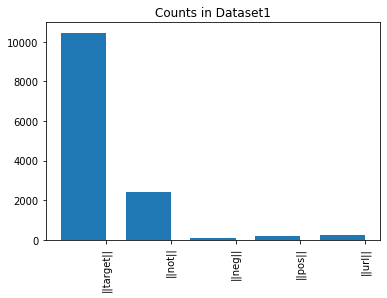

In [70]:
plt.close()
tag_counter_keys = [x[0] for x in tag_counter]
tag_counter_values = [x[1] for x in tag_counter]
indexes = np.arange(len(tag_counter_keys))
width = 0.7
plt.bar(indexes, tag_counter_values, width)
plt.title("Counts in Dataset1")
plt.xticks(indexes + width * 0.5, tag_counter_keys, rotation="vertical") 


([<matplotlib.axis.XTick at 0x220b47a9348>,
 <a list of 5 Text xticklabel objects>)

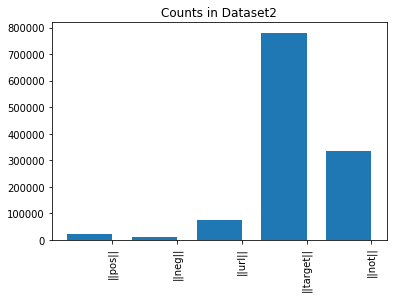

In [71]:
plt.close()
tag_counter_keys2 = [x[0] for x in tag_counter2]
tag_counter_values2 = [x[1] for x in tag_counter2]
indexes = np.arange(len(tag_counter_keys2))
width = 0.7
plt.bar(indexes, tag_counter_values2, width)
plt.title("Counts in Dataset2")
plt.xticks(indexes + width * 0.5, tag_counter_keys2, rotation="vertical") 


In [72]:
# Transform the dataframe into a dictionary
stopword_dictionary = dict.fromkeys(stops.Word, None)

# Remove stopword from tweets
def remove_stopwords(tweet):
    tweet = [stopword_dictionary[word] if stopword_dictionary.__contains__(word) else word for word in tweet]
    return [word for word in tweet if word]
# Remove stop words in both dataset1 and 2
data.SentimentText = data.SentimentText.apply(lambda tweet: remove_stopwords(tweet))
data2.SentimentText = data2.SentimentText.apply(lambda tweet: remove_stopwords(tweet))

In [73]:
# Most common words after deleting stop words
word_frequency_table = Counter()

# Dataset1
data.SentimentText.map(lambda tweet: count_word(tweet))
print('Most common words after deleting stop words in dataset1: ')
print (word_frequency_table.most_common()[:20])

Most common words after deleting stop words in dataset1: 
[('||target||', 10454), ('||not||', 2391), ('a', 2218), ('laughing', 741), ('loud', 671), ('good', 635), ('like', 578), ('love', 476), ('yeah', 394), ('message', 381), ('instant', 363), ('haha', 355), ('time', 303), ('hope', 299), ('day', 292), ('||url||', 252), ('work', 247), ('today', 229), ('aww', 216), ('||pos||', 207)]


In [74]:
# Most common words after deleting stop words
word_frequency_table2 = Counter()

#Dataset2
data2.SentimentText.map(lambda tweet: count_word2(tweet))
print('Most common words after deleting stop words in dataset2: ')
print (word_frequency_table2.most_common()[:20])

Most common words after deleting stop words in dataset2: 
[('||target||', 780664), ('a', 383910), ('||not||', 334513), ('good', 95283), ('day', 84996), ('like', 78959), ('||url||', 75414), ('today', 68974), ('love', 68600), ('laughing', 66411), ('work', 64029), ('loud', 61141), ('time', 57864), ('message', 54282), ('instant', 52222), ('night', 47055), ('home', 39879), ('yeah', 36746), ('tomorrow', 36262), ('great', 34086)]


In [75]:
# Same procedure after removing stopwords
# unigrams only after removing stop words for dataset1
def classify_unigram_nostop(training_tweets, test_tweets, ngram=(1, 1)):
    global models
    models = []
    models.append(('Multi_uni_nostop', MultinomialNB()))
    models.append(('DT_uni_nostop', DecisionTreeClassifier()))
    models.append(('KN_uni_nostop', KNeighborsClassifier()))
    models.append(('SGD_uni_nostop', SGDClassifier()))
    models.append(('SVM_uni_nostop', SVC()))
    models.append(('LR_uni_nostop', LogisticRegression(solver='lbfgs')))
    results= []
    names= []
    # F1 scores for each fold
    global scores
    scores = []
    
    #for name,model in models:
        
    # Provides train/test indices to split data in train, validation sets.
    k_fold = KFold(n_splits=10, shuffle = True)

    # Used to convert a collection of text docuements to a matrix of token counts => Bag of words
    count_vectorizer = CountVectorizer(ngram_range=ngram)

    # Confusion matrix with TP/FP/TN/FN
    confusion = np.array([[0, 0], [0, 0]])
    for name,model in models:
        print(name)
        score2=0
        for training_indices, validation_indices in k_fold.split(training_tweets):
                
                training_features = count_vectorizer.fit_transform(training_tweets.iloc[training_indices]['SentimentText'].values)
                training_labels = training_tweets.iloc[training_indices]['Sentiment'].values

                validation_features = count_vectorizer.transform(training_tweets.iloc[validation_indices]['SentimentText'].values)
                validation_labels = training_tweets.iloc[validation_indices]['Sentiment'].values

                classifier = model
                classifier.fit(training_features, training_labels)
                validation_predictions = classifier.predict(validation_features)

                confusion += confusion_matrix(validation_labels, validation_predictions)
                score = f1_score(validation_labels, validation_predictions)
                precision=precision_score(validation_labels, validation_predictions)
                recall=recall_score(validation_labels,validation_predictions)
                accuracy=accuracy_score(validation_labels, validation_predictions)
                scores.append(score)
                # Save to file in the current working directory
                pkl_filename = "C:/Users/USER/Desktop/BE/Models/"+name+".pkl"
                if score>score2:
                    with open(pkl_filename, 'wb') as file:
                        pickle.dump(classifier, file)
                        pickle.dump(count_vectorizer, file)
                    score2=score
                
        print('\n')
        print ('Total tweets classified: ' + str(len(training_tweets)))
        print('\n')
        print ('F1 Score: ' +  (str(sum(scores)/len(scores)*100)+'%'))
        print ('Accuracy: ' + str(accuracy*100)+ '%')
        print ('Precision: ' + str(precision*100)+ '%')
        print ('Recall: ' + str(recall*100)+ '%')
        print('\n')
        print ('Confusion matrix:')
        print (confusion)
        print('\n')
        print('-------------------------------------')
        print('\n')

        
classify_unigram_nostop(training_tweets, test_tweets)

Multi_uni_nostop


Total tweets classified: 9000


F1 Score: 71.03809332202962%
Accuracy: 71.44444444444444%
Precision: 74.82352941176471%
Recall: 67.94871794871796%


Confusion matrix:
[[3396 1104]
 [1412 3088]]


-------------------------------------


DT_uni_nostop


Total tweets classified: 9000


F1 Score: 68.08207906678567%
Accuracy: 68.0%
Precision: 66.98795180722892%
Recall: 64.80186480186481%


Confusion matrix:
[[6403 2597]
 [3017 5983]]


-------------------------------------


KN_uni_nostop


Total tweets classified: 9000


F1 Score: 67.01367555848583%
Accuracy: 65.66666666666666%
Precision: 63.0188679245283%
Recall: 74.72035794183445%


Confusion matrix:
[[8854 4646]
 [4371 9129]]


-------------------------------------


SGD_uni_nostop


Total tweets classified: 9000


F1 Score: 68.13940931434735%
Accuracy: 70.0%
Precision: 71.93763919821826%
Recall: 69.16488222698072%


Confusion matrix:
[[11983  6017]
 [ 5601 12399]]


-------------------------------------


SVM_uni_nos

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre



Total tweets classified: 9000


F1 Score: 69.88277430145176%
Accuracy: 74.44444444444444%
Precision: 75.86206896551724%
Recall: 74.8936170212766%


Confusion matrix:
[[18318  8682]
 [ 7841 19159]]


-------------------------------------




C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [76]:
# Dataset2 no stop words and unigrams only
def classify_unigram_nostop2(training_tweets2, test_tweets2, ngram=(1, 1)):
    global models
    models = []
    models.append(('Multi_uni_nostop2', MultinomialNB()))
    results= []
    names= []
    # F1 scores for each fold
    global scores
    scores = []
    
    #for name,model in models:
        
    # Provides train/test indices to split data in train, validation sets.
    k_fold = KFold(n_splits=10, shuffle = True)

    # Used to convert a collection of text docuements to a matrix of token counts => Bag of words
    count_vectorizer = CountVectorizer(ngram_range=ngram)

    # Confusion matrix with TP/FP/TN/FN
    confusion = np.array([[0, 0], [0, 0]])
    for name,model in models:
        print(name)
        score2=0
        for training_indices, validation_indices in k_fold.split(training_tweets):
                
                training_features = count_vectorizer.fit_transform(training_tweets2.iloc[training_indices]['SentimentText'].values)
                training_labels = training_tweets2.iloc[training_indices]['Sentiment'].values

                validation_features = count_vectorizer.transform(training_tweets2.iloc[validation_indices]['SentimentText'].values)
                validation_labels = training_tweets2.iloc[validation_indices]['Sentiment'].values

                classifier = model
                classifier.fit(training_features, training_labels)
                validation_predictions = classifier.predict(validation_features)

                confusion += confusion_matrix(validation_labels, validation_predictions)
                score = f1_score(validation_labels, validation_predictions)
                precision=precision_score(validation_labels, validation_predictions)
                recall=recall_score(validation_labels,validation_predictions)
                accuracy=accuracy_score(validation_labels, validation_predictions)
                scores.append(score)
                # Save to file in the current working directory
                pkl_filename = "C:/Users/USER/Desktop/BE/Models/"+name+".pkl"
                if score>score2:
                    with open(pkl_filename, 'wb') as file:
                        pickle.dump(classifier, file)
                        pickle.dump(count_vectorizer, file)
                    score2=score
                
        print('\n')
        print ('Total tweets classified: ' + str(len(training_tweets2)))
        print('\n')
        print ('F1 Score: ' +  (str(sum(scores)/len(scores)*100)+'%'))
        print ('Accuracy: ' + str(accuracy*100)+ '%')
        print ('Precision: ' + str(precision*100)+ '%')
        print ('Recall: ' + str(recall*100)+ '%')
        print('\n')
        print ('Confusion matrix:')
        print (confusion)
        print('\n')
        print('-------------------------------------')
        print('\n')

        
classify_unigram_nostop2(training_tweets2, test_tweets2)

Multi_uni_nostop2


Total tweets classified: 1183958


F1 Score: 73.57399427999496%
Accuracy: 72.22222222222221%
Precision: 74.47306791569088%
Recall: 69.28104575163398%


Confusion matrix:
[[3347 1075]
 [1288 3290]]


-------------------------------------




In [77]:
# Dataset1 nostopwords with unigrams and bigrams
def classify_unigrambigram_nostop(training_tweets, test_tweets, ngram=(1, 2)):
    global models
    models = []
    models.append(('Multi_unibi_nostop', MultinomialNB()))
    models.append(('DT_unibi_nostop', DecisionTreeClassifier()))
    models.append(('KN_unibi_nostop', KNeighborsClassifier()))
    models.append(('SGD_unibi_nostop', SGDClassifier()))
    models.append(('SVM_unibi_nostop', SVC()))
    models.append(('LR_unibi_nostop', LogisticRegression(solver='lbfgs')))
    results= []
    names= []
    # F1 scores for each fold
    global scores
    scores = []
    
    #for name,model in models:
        
    # Provides train/test indices to split data in train, validation sets.
    k_fold = KFold(n_splits=10, shuffle = True)

    # Used to convert a collection of text docuements to a matrix of token counts => Bag of words
    count_vectorizer = CountVectorizer(ngram_range=ngram)

    # Confusion matrix with TP/FP/TN/FN
    confusion = np.array([[0, 0], [0, 0]])
    for name,model in models:
        print(name)
        score2=0
        for training_indices, validation_indices in k_fold.split(training_tweets):
                
                training_features = count_vectorizer.fit_transform(training_tweets.iloc[training_indices]['SentimentText'].values)
                training_labels = training_tweets.iloc[training_indices]['Sentiment'].values

                validation_features = count_vectorizer.transform(training_tweets.iloc[validation_indices]['SentimentText'].values)
                validation_labels = training_tweets.iloc[validation_indices]['Sentiment'].values

                classifier = model
                classifier.fit(training_features, training_labels)
                validation_predictions = classifier.predict(validation_features)

                confusion += confusion_matrix(validation_labels, validation_predictions)
                score = f1_score(validation_labels, validation_predictions)
                precision=precision_score(validation_labels, validation_predictions)
                recall=recall_score(validation_labels,validation_predictions)
                accuracy=accuracy_score(validation_labels, validation_predictions)
                scores.append(score)
                # Save to file in the current working directory
                pkl_filename = "C:/Users/USER/Desktop/BE/Models/"+name+".pkl"
                if score>score2:
                    with open(pkl_filename, 'wb') as file:
                        pickle.dump(classifier, file)
                        pickle.dump(count_vectorizer, file)
                    score2=score
                
        print('\n')
        print ('Total tweets classified: ' + str(len(training_tweets)))
        print('\n')
        print ('F1 Score: ' +  (str(sum(scores)/len(scores)*100)+'%'))
        print ('Accuracy: ' + str(accuracy*100)+ '%')
        print ('Precision: ' + str(precision*100)+ '%')
        print ('Recall: ' + str(recall*100)+ '%')
        print('\n')
        print ('Confusion matrix:')
        print (confusion)
        print('\n')
        print('-------------------------------------')
        print('\n')

        
classify_unigrambigram_nostop(training_tweets, test_tweets)

Multi_unibi_nostop


Total tweets classified: 9000


F1 Score: 70.95959402712396%
Accuracy: 71.44444444444444%
Precision: 70.84398976982096%
Recall: 65.95238095238095%


Confusion matrix:
[[3494 1006]
 [1470 3030]]


-------------------------------------


DT_unibi_nostop


Total tweets classified: 9000


F1 Score: 67.99222213831825%
Accuracy: 67.11111111111111%
Precision: 67.03539823008849%
Recall: 67.33333333333333%


Confusion matrix:
[[6488 2512]
 [3075 5925]]


-------------------------------------


KN_unibi_nostop


Total tweets classified: 9000


F1 Score: 65.3125731854988%
Accuracy: 56.888888888888886%
Precision: 57.719298245614034%
Recall: 69.11764705882352%


Confusion matrix:
[[8976 4524]
 [4783 8717]]


-------------------------------------


SGD_unibi_nostop


Total tweets classified: 9000


F1 Score: 67.00932288178201%
Accuracy: 70.55555555555556%
Precision: 69.05829596412556%
Recall: 70.80459770114943%


Confusion matrix:
[[12171  5829]
 [ 6005 11995]]


---------------

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre



Total tweets classified: 9000


F1 Score: 69.38562675791205%
Accuracy: 75.22222222222223%
Precision: 74.8936170212766%
Recall: 77.02407002188184%


Confusion matrix:
[[18459  8541]
 [ 8102 18898]]


-------------------------------------




C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [78]:
# Dataset2 for unigrams and bigrams after removing stopwords
def classify_unigrambigram_nostop2(training_tweets2, test_tweets2, ngram=(1, 2)):
    global models
    models = []
    models.append(('Multi_unibi_nostop2', MultinomialNB()))

    results= []
    names= []
    # F1 scores for each fold
    global scores
    scores = []
    
    #for name,model in models:
        
    # Provides train/test indices to split data in train, validation sets.
    k_fold = KFold(n_splits=10, shuffle = True)

    # Used to convert a collection of text docuements to a matrix of token counts => Bag of words
    count_vectorizer = CountVectorizer(ngram_range=ngram)

    # Confusion matrix with TP/FP/TN/FN
    confusion = np.array([[0, 0], [0, 0]])
    for name,model in models:
        print(name)
        score2=0
        for training_indices, validation_indices in k_fold.split(training_tweets2):
                
                training_features = count_vectorizer.fit_transform(training_tweets2.iloc[training_indices]['SentimentText'].values)
                training_labels = training_tweets2.iloc[training_indices]['Sentiment'].values

                validation_features = count_vectorizer.transform(training_tweets2.iloc[validation_indices]['SentimentText'].values)
                validation_labels = training_tweets2.iloc[validation_indices]['Sentiment'].values

                classifier = model
                classifier.fit(training_features, training_labels)
                validation_predictions = classifier.predict(validation_features)

                confusion += confusion_matrix(validation_labels, validation_predictions)
                score = f1_score(validation_labels, validation_predictions)
                precision=precision_score(validation_labels, validation_predictions)
                recall=recall_score(validation_labels,validation_predictions)
                accuracy=accuracy_score(validation_labels, validation_predictions)
                scores.append(score)
                # Save to file in the current working directory
                pkl_filename = "C:/Users/USER/Desktop/BE/Models/"+name+".pkl"
                if score>score2:
                    with open(pkl_filename, 'wb') as file:
                        pickle.dump(classifier, file)
                        pickle.dump(count_vectorizer, file)
                    score2=score
                
        print('\n')
        print ('Total tweets classified: ' + str(len(training_tweets2)))
        print('\n')
        print ('F1 Score: ' +  (str(sum(scores)/len(scores)*100)+'%'))
        print ('Accuracy: ' + str(accuracy*100)+ '%')
        print ('Precision: ' + str(precision*100)+ '%')
        print ('Recall: ' + str(recall*100)+ '%')
        print('\n')
        print ('Confusion matrix:')
        print (confusion)
        print('\n')
        print('-------------------------------------')
        print('\n')

        
classify_unigrambigram_nostop2(training_tweets2, test_tweets2)

Multi_unibi_nostop2


Total tweets classified: 1183958


F1 Score: 79.62993346849872%
Accuracy: 80.0050677815786%
Precision: 81.3805566875144%
Recall: 77.72438066874238%


Confusion matrix:
[[486558 104768]
 [131271 461361]]


-------------------------------------




In [79]:
# Dataset1 bigrams only after removing stopwords
def classify_bigram_nostop(training_tweets, test_tweets, ngram=(2, 2)):
    global models
    models = []
    models.append(('Multi_bi_nostop', MultinomialNB()))
    models.append(('DT_bi_nostop', DecisionTreeClassifier()))
    models.append(('KN_bi_nostop', KNeighborsClassifier()))
    models.append(('SGD_bi_nostop', SGDClassifier()))
    models.append(('SVM_bi_nostop', SVC()))
    models.append(('LR_bi_nostop', LogisticRegression(solver='lbfgs')))
    results= []
    names= []
    # F1 scores for each fold
    global scores
    scores = []
    
    #for name,model in models:
        
    # Provides train/test indices to split data in train, validation sets.
    k_fold = KFold(n_splits=10, shuffle = True)

    # Used to convert a collection of text docuements to a matrix of token counts => Bag of words
    count_vectorizer = CountVectorizer(ngram_range=ngram)

    # Confusion matrix with TP/FP/TN/FN
    confusion = np.array([[0, 0], [0, 0]])
    for name,model in models:
        print(name)
        score2=0
        for training_indices, validation_indices in k_fold.split(training_tweets):
                
                training_features = count_vectorizer.fit_transform(training_tweets.iloc[training_indices]['SentimentText'].values)
                training_labels = training_tweets.iloc[training_indices]['Sentiment'].values

                validation_features = count_vectorizer.transform(training_tweets.iloc[validation_indices]['SentimentText'].values)
                validation_labels = training_tweets.iloc[validation_indices]['Sentiment'].values

                classifier = model
                classifier.fit(training_features, training_labels)
                validation_predictions = classifier.predict(validation_features)

                confusion += confusion_matrix(validation_labels, validation_predictions)
                score = f1_score(validation_labels, validation_predictions)
                precision=precision_score(validation_labels, validation_predictions)
                recall=recall_score(validation_labels,validation_predictions)
                accuracy=accuracy_score(validation_labels, validation_predictions)
                scores.append(score)
                # Save to file in the current working directory
                pkl_filename = "C:/Users/USER/Desktop/BE/Models/"+name+".pkl"
                if score>score2:
                    with open(pkl_filename, 'wb') as file:
                        pickle.dump(classifier, file)
                        pickle.dump(count_vectorizer, file)
                    score2=score
                
        print('\n')
        print ('Total tweets classified: ' + str(len(training_tweets)))
        print('\n')
        print ('F1 Score: ' +  (str(sum(scores)/len(scores)*100)+'%'))
        print ('Accuracy: ' + str(accuracy*100)+ '%')
        print ('Precision: ' + str(precision*100)+ '%')
        print ('Recall: ' + str(recall*100)+ '%')
        print('\n')
        print ('Confusion matrix:')
        print (confusion)
        print('\n')
        print('-------------------------------------')
        print('\n')

        
classify_bigram_nostop(training_tweets, test_tweets)

Multi_bi_nostop


Total tweets classified: 9000


F1 Score: 67.9609348363663%
Accuracy: 66.88888888888889%
Precision: 72.79411764705883%
Recall: 61.36363636363637%


Confusion matrix:
[[3260 1240]
 [1545 2955]]


-------------------------------------


DT_bi_nostop


Total tweets classified: 9000


F1 Score: 65.14657401465533%
Accuracy: 61.88888888888889%
Precision: 62.41299303944315%
Recall: 59.77777777777777%


Confusion matrix:
[[6202 2798]
 [3300 5700]]


-------------------------------------


KN_bi_nostop


Total tweets classified: 9000


F1 Score: 62.06173324351906%
Accuracy: 55.222222222222214%
Precision: 55.34441805225653%
Recall: 52.00892857142857%


Confusion matrix:
[[8704 4796]
 [5267 8233]]


-------------------------------------


SGD_bi_nostop


Total tweets classified: 9000


F1 Score: 63.87969486215972%
Accuracy: 66.11111111111111%
Precision: 63.94422310756972%
Recall: 72.13483146067415%


Confusion matrix:
[[11606  6394]
 [ 6530 11470]]


----------------------------

In [80]:
# Dataset2 after removing stopwords and using only bigrams
def classify_bigram_nostop2(training_tweets2, test_tweets2, ngram=(2, 2)):
    global models
    models = []
    models.append(('Multi_bi_nostop2', MultinomialNB()))
    results= []
    names= []
    # F1 scores for each fold
    global scores
    scores = []
    
    #for name,model in models:
        
    # Provides train/test indices to split data in train, validation sets.
    k_fold = KFold(n_splits=10, shuffle = True)

    # Used to convert a collection of text docuements to a matrix of token counts => Bag of words
    count_vectorizer = CountVectorizer(ngram_range=ngram)

    # Confusion matrix with TP/FP/TN/FN
    confusion = np.array([[0, 0], [0, 0]])
    for name,model in models:
        print(name)
        score2=0
        for training_indices, validation_indices in k_fold.split(training_tweets2):
                
                training_features = count_vectorizer.fit_transform(training_tweets2.iloc[training_indices]['SentimentText'].values)
                training_labels = training_tweets2.iloc[training_indices]['Sentiment'].values

                validation_features = count_vectorizer.transform(training_tweets2.iloc[validation_indices]['SentimentText'].values)
                validation_labels = training_tweets2.iloc[validation_indices]['Sentiment'].values

                classifier = model
                classifier.fit(training_features, training_labels)
                validation_predictions = classifier.predict(validation_features)

                confusion += confusion_matrix(validation_labels, validation_predictions)
                score = f1_score(validation_labels, validation_predictions)
                precision=precision_score(validation_labels, validation_predictions)
                recall=recall_score(validation_labels,validation_predictions)
                accuracy=accuracy_score(validation_labels, validation_predictions)
                scores.append(score)
                # Save to file in the current working directory
                pkl_filename = "C:/Users/USER/Desktop/BE/Models/"+name+".pkl"
                if score>score2:
                    with open(pkl_filename, 'wb') as file:
                        pickle.dump(classifier, file)
                        pickle.dump(count_vectorizer, file)
                    score2=score
                
        print('\n')
        print ('Total tweets classified: ' + str(len(training_tweets2)))
        print('\n')
        print ('F1 Score: ' +  (str(sum(scores)/len(scores)*100)+'%'))
        print ('Accuracy: ' + str(accuracy*100)+ '%')
        print ('Precision: ' + str(precision*100)+ '%')
        print ('Recall: ' + str(recall*100)+ '%')
        print('\n')
        print ('Confusion matrix:')
        print (confusion)
        print('\n')
        print('-------------------------------------')
        print('\n')

        
classify_bigram_nostop2(training_tweets2, test_tweets2)

Multi_bi_nostop2


Total tweets classified: 1183958


F1 Score: 78.56885519287022%
Accuracy: 78.86735081717978%
Precision: 80.18929677134011%
Recall: 76.63189572097583%


Confusion matrix:
[[480586 110740]
 [137532 455100]]


-------------------------------------




In [81]:
# Before Stemming
data2

,Sentiment,SentimentText
0,0,"[sad, apl, friend]"
1,0,"[missed, moon, trailer]"
2,1,"[god, 7, 30, ||pos||]"
3,0,"[omgaga, instant, message, soo, instant, message, gunna, cry, dentist, 11, suposed, a, crown, put, 30mins]"
4,0,"[mi, boyfriend, cheating, ||neg||]"
...,...,...
1578607,1,"[zz, finally, night, tweeters]"
1578608,1,"[zz, sleep, people]"
1578609,0,"[zz, wait, homework]"
1578610,0,[zz]


In [82]:
# Now we use porterstemmer for stemming to check whether our scores will improve or not
import nltk

pstemmer = nltk.PorterStemmer()
def stemming_words(tweet):
    return [pstemmer.stem(word) if word not in tags else word for word in tweet]

# applying the stemming function to both datasets
data.SentimentText = data.SentimentText.apply(lambda tweet: stemming_words(tweet))
data2.SentimentText = data2.SentimentText.apply(lambda tweet: stemming_words(tweet))

In [83]:
# After Stemming
data2

,Sentiment,SentimentText
0,0,"[sad, apl, friend]"
1,0,"[miss, moon, trailer]"
2,1,"[god, 7, 30, ||pos||]"
3,0,"[omgaga, instant, messag, soo, instant, messag, gunna, cri, dentist, 11, supos, a, crown, put, 30min]"
4,0,"[mi, boyfriend, cheat, ||neg||]"
...,...,...
1578607,1,"[zz, final, night, tweeter]"
1578608,1,"[zz, sleep, peopl]"
1578609,0,"[zz, wait, homework]"
1578610,0,[zz]


In [84]:
# Dataset1 unigrams only after stemming
def classify_unigram_stem(training_tweets, test_tweets, ngram=(1, 1)):
    global models
    models = []
    models.append(('Multi_uni_stem', MultinomialNB()))
    models.append(('DT_uni_stem', DecisionTreeClassifier()))
    models.append(('KN_uni_stem', KNeighborsClassifier()))
    models.append(('SGD_uni_stem', SGDClassifier()))
    models.append(('SVM_uni_stem', SVC()))
    models.append(('LR_uni_stem', LogisticRegression(solver='lbfgs')))
    results= []
    names= []
    # F1 scores for each fold
    global scores
    scores = []
    
    #for name,model in models:
        
    # Provides train/test indices to split data in train, validation sets.
    k_fold = KFold(n_splits=10, shuffle = True)

    # Used to convert a collection of text docuements to a matrix of token counts => Bag of words
    count_vectorizer = CountVectorizer(ngram_range=ngram)

    # Confusion matrix with TP/FP/TN/FN
    confusion = np.array([[0, 0], [0, 0]])
    for name,model in models:
        print(name)
        score2=0
        for training_indices, validation_indices in k_fold.split(training_tweets):
                
                training_features = count_vectorizer.fit_transform(training_tweets.iloc[training_indices]['SentimentText'].values)
                training_labels = training_tweets.iloc[training_indices]['Sentiment'].values

                validation_features = count_vectorizer.transform(training_tweets.iloc[validation_indices]['SentimentText'].values)
                validation_labels = training_tweets.iloc[validation_indices]['Sentiment'].values

                classifier = model
                classifier.fit(training_features, training_labels)
                validation_predictions = classifier.predict(validation_features)

                confusion += confusion_matrix(validation_labels, validation_predictions)
                score = f1_score(validation_labels, validation_predictions)
                precision=precision_score(validation_labels, validation_predictions)
                recall=recall_score(validation_labels,validation_predictions)
                accuracy=accuracy_score(validation_labels, validation_predictions)
                scores.append(score)
                # Save to file in the current working directory
                pkl_filename = "C:/Users/USER/Desktop/BE/Models/"+name+".pkl"
                if score>score2:
                    with open(pkl_filename, 'wb') as file:
                        pickle.dump(classifier, file)
                        pickle.dump(count_vectorizer, file)
                        
                    score2=score
                
        print('\n')
        print ('Total tweets classified: ' + str(len(training_tweets)))
        print('\n')
        print ('F1 Score: ' +  (str(sum(scores)/len(scores)*100)+'%'))
        print ('Accuracy: ' + str(accuracy*100)+ '%')
        print ('Precision: ' + str(precision*100)+ '%')
        print ('Recall: ' + str(recall*100)+ '%')
        print('\n')
        print ('Confusion matrix:')
        print (confusion)
        print('\n')
        print('-------------------------------------')
        print('\n')

        
classify_unigram_stem(training_tweets, test_tweets)

Multi_uni_stem


Total tweets classified: 9000


F1 Score: 71.26855233475081%
Accuracy: 71.33333333333334%
Precision: 71.63461538461539%
Recall: 68.0365296803653%


Confusion matrix:
[[3415 1085]
 [1407 3093]]


-------------------------------------


DT_uni_stem


Total tweets classified: 9000


F1 Score: 68.32009313612866%
Accuracy: 64.22222222222223%
Precision: 63.39285714285714%
Recall: 64.25339366515837%


Confusion matrix:
[[6458 2542]
 [3013 5987]]


-------------------------------------


KN_uni_stem


Total tweets classified: 9000


F1 Score: 67.0323144424401%
Accuracy: 62.22222222222222%
Precision: 61.84738955823293%
Recall: 67.24890829694323%


Confusion matrix:
[[8892 4608]
 [4389 9111]]


-------------------------------------


SGD_uni_stem


Total tweets classified: 9000


F1 Score: 68.17341427954875%
Accuracy: 72.44444444444444%
Precision: 76.26728110599078%
Recall: 69.53781512605042%


Confusion matrix:
[[12045  5955]
 [ 5627 12373]]


----------------------------------

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre



Total tweets classified: 9000


F1 Score: 69.86373180709641%
Accuracy: 72.88888888888889%
Precision: 70.87576374745417%
Recall: 77.50556792873051%


Confusion matrix:
[[18363  8637]
 [ 7874 19126]]


-------------------------------------




C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [85]:
# Dataset2 unigrams after stemming
def classify_unigram_stem2(training_tweets2, test_tweets2, ngram=(1, 1)):
    global models
    models = []
    models.append(('Multi_uni_stem2', MultinomialNB()))
    results= []
    names= []
    # F1 scores for each fold
    global scores
    scores = []
    
    #for name,model in models:
        
    # Provides train/test indices to split data in train, validation sets.
    k_fold = KFold(n_splits=10, shuffle = True)

    # Used to convert a collection of text docuements to a matrix of token counts => Bag of words
    count_vectorizer = CountVectorizer(ngram_range=ngram)

    # Confusion matrix with TP/FP/TN/FN
    confusion = np.array([[0, 0], [0, 0]])
    for name,model in models:
        print(name)
        score2=0
        for training_indices, validation_indices in k_fold.split(training_tweets2):
                
                training_features = count_vectorizer.fit_transform(training_tweets2.iloc[training_indices]['SentimentText'].values)
                training_labels = training_tweets2.iloc[training_indices]['Sentiment'].values

                validation_features = count_vectorizer.transform(training_tweets2.iloc[validation_indices]['SentimentText'].values)
                validation_labels = training_tweets2.iloc[validation_indices]['Sentiment'].values

                classifier = model
                classifier.fit(training_features, training_labels)
                validation_predictions = classifier.predict(validation_features)

                confusion += confusion_matrix(validation_labels, validation_predictions)
                score = f1_score(validation_labels, validation_predictions)
                precision=precision_score(validation_labels, validation_predictions)
                recall=recall_score(validation_labels,validation_predictions)
                accuracy=accuracy_score(validation_labels, validation_predictions)
                scores.append(score)
                # Save to file in the current working directory
                pkl_filename = "C:/Users/USER/Desktop/BE/Models/"+name+".pkl"
                if score>score2:
                    with open(pkl_filename, 'wb') as file:
                        pickle.dump(classifier, file)
                        pickle.dump(count_vectorizer, file)
                    score2=score
                
        print('\n')
        print ('Total tweets classified: ' + str(len(training_tweets2)))
        print('\n')
        print ('F1 Score: ' +  (str(sum(scores)/len(scores)*100)+'%'))
        print ('Accuracy: ' + str(accuracy*100)+ '%')
        print ('Precision: ' + str(precision*100)+ '%')
        print ('Recall: ' + str(recall*100)+ '%')
        print('\n')
        print ('Confusion matrix:')
        print (confusion)
        print('\n')
        print('-------------------------------------')
        print('\n')

        
classify_unigram_stem2(training_tweets2, test_tweets2)

Multi_uni_stem2


Total tweets classified: 1183958


F1 Score: 77.68876256628077%
Accuracy: 77.84281430803665%
Precision: 78.42502142245073%
Recall: 77.03223634374211%


Confusion matrix:
[[465127 126199]
 [136050 456582]]


-------------------------------------




In [86]:
# Unigrams and bigrams after stemming for dataset1
def classify_unigrambigram_stem(training_tweets, test_tweets, ngram=(1, 2)):
    global models
    models = []
    models.append(('Multi_unibi_stem', MultinomialNB()))
    models.append(('DT_unibi_stem', DecisionTreeClassifier()))
    models.append(('KN_unibi_stem', KNeighborsClassifier()))
    models.append(('SGD_unibi_stem', SGDClassifier()))
    models.append(('SVM_unibi_stem', SVC()))
    models.append(('LR_unibi_stem', LogisticRegression(solver='lbfgs')))
    results= []
    names= []
    # F1 scores for each fold
    global scores
    scores = []
    
    #for name,model in models:
        
    # Provides train/test indices to split data in train, validation sets.
    k_fold = KFold(n_splits=10, shuffle = True)

    # Used to convert a collection of text docuements to a matrix of token counts => Bag of words
    count_vectorizer = CountVectorizer(ngram_range=ngram)

    # Confusion matrix with TP/FP/TN/FN
    confusion = np.array([[0, 0], [0, 0]])
    for name,model in models:
        print(name)
        score2=0
        for training_indices, validation_indices in k_fold.split(training_tweets):
                
                training_features = count_vectorizer.fit_transform(training_tweets.iloc[training_indices]['SentimentText'].values)
                training_labels = training_tweets.iloc[training_indices]['Sentiment'].values

                validation_features = count_vectorizer.transform(training_tweets.iloc[validation_indices]['SentimentText'].values)
                validation_labels = training_tweets.iloc[validation_indices]['Sentiment'].values

                classifier = model
                classifier.fit(training_features, training_labels)
                validation_predictions = classifier.predict(validation_features)

                confusion += confusion_matrix(validation_labels, validation_predictions)
                score = f1_score(validation_labels, validation_predictions)
                precision=precision_score(validation_labels, validation_predictions)
                recall=recall_score(validation_labels,validation_predictions)
                accuracy=accuracy_score(validation_labels, validation_predictions)
                scores.append(score)
                # Save to file in the current working directory
                pkl_filename = "C:/Users/USER/Desktop/BE/Models/"+name+".pkl"
                if score>score2:
                    with open(pkl_filename, 'wb') as file:
                        pickle.dump(classifier, file)
                        pickle.dump(count_vectorizer, file)
                    score2=score
                
        print('\n')
        print ('Total tweets classified: ' + str(len(training_tweets)))
        print('\n')
        print ('F1 Score: ' +  (str(sum(scores)/len(scores)*100)+'%'))
        print ('Accuracy: ' + str(accuracy*100)+ '%')
        print ('Precision: ' + str(precision*100)+ '%')
        print ('Recall: ' + str(recall*100)+ '%')
        print('\n')
        print ('Confusion matrix:')
        print (confusion)
        print('\n')
        print('-------------------------------------')
        print('\n')

        
classify_unigrambigram_stem(training_tweets, test_tweets)

Multi_unibi_stem


Total tweets classified: 9000


F1 Score: 70.97504989573011%
Accuracy: 73.66666666666667%
Precision: 77.9746835443038%
Recall: 67.24890829694323%


Confusion matrix:
[[3519  981]
 [1484 3016]]


-------------------------------------


DT_unibi_stem


Total tweets classified: 9000


F1 Score: 68.34016926662298%
Accuracy: 68.66666666666667%
Precision: 68.06526806526807%
Recall: 66.81922196796339%


Confusion matrix:
[[6568 2432]
 [3072 5928]]


-------------------------------------


KN_unibi_stem


Total tweets classified: 9000


F1 Score: 65.55062300085748%
Accuracy: 56.55555555555556%
Precision: 55.29661016949152%
Recall: 59.183673469387756%


Confusion matrix:
[[9093 4407]
 [4791 8709]]


-------------------------------------


SGD_unibi_stem


Total tweets classified: 9000


F1 Score: 67.43788931836512%
Accuracy: 70.22222222222221%
Precision: 67.19457013574662%
Recall: 70.71428571428572%


Confusion matrix:
[[12231  5769]
 [ 5911 12089]]


------------------------

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre



Total tweets classified: 9000


F1 Score: 69.63302429207769%
Accuracy: 73.66666666666667%
Precision: 71.52173913043478%
Recall: 75.63218390804597%


Confusion matrix:
[[18496  8504]
 [ 8013 18987]]


-------------------------------------




C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [87]:
# Unigrams and bigrams after stemming for Dataset2
def classify_unigrambigram_stem2(training_tweets2, test_tweets2, ngram=(1, 2)):
    global models
    models = []
    models.append(('Multi_unibi_stem2', MultinomialNB()))
    results= []
    names= []
    # F1 scores for each fold
    global scores
    scores = []
    
    #for name,model in models:
        
    # Provides train/test indices to split data in train, validation sets.
    k_fold = KFold(n_splits=10, shuffle = True)

    # Used to convert a collection of text docuements to a matrix of token counts => Bag of words
    count_vectorizer = CountVectorizer(ngram_range=ngram)

    # Confusion matrix with TP/FP/TN/FN
    confusion = np.array([[0, 0], [0, 0]])
    for name,model in models:
        print(name)
        score2=0
        for training_indices, validation_indices in k_fold.split(training_tweets2):
                
                training_features = count_vectorizer.fit_transform(training_tweets2.iloc[training_indices]['SentimentText'].values)
                training_labels = training_tweets2.iloc[training_indices]['Sentiment'].values

                validation_features = count_vectorizer.transform(training_tweets2.iloc[validation_indices]['SentimentText'].values)
                validation_labels = training_tweets2.iloc[validation_indices]['Sentiment'].values

                classifier = model
                classifier.fit(training_features, training_labels)
                validation_predictions = classifier.predict(validation_features)

                confusion += confusion_matrix(validation_labels, validation_predictions)
                score = f1_score(validation_labels, validation_predictions)
                precision=precision_score(validation_labels, validation_predictions)
                recall=recall_score(validation_labels,validation_predictions)
                accuracy=accuracy_score(validation_labels, validation_predictions)
                scores.append(score)
                # Save to file in the current working directory
                pkl_filename = "C:/Users/USER/Desktop/BE/Models/"+name+".pkl"
                if score>score2:
                    with open(pkl_filename, 'wb') as file:
                        pickle.dump(classifier, file)
                        pickle.dump(count_vectorizer, file)
                    score2=score
                
        print('\n')
        print ('Total tweets classified: ' + str(len(training_tweets2)))
        print('\n')
        print ('F1 Score: ' +  (str(sum(scores)/len(scores)*100)+'%'))
        print ('Accuracy: ' + str(accuracy*100)+ '%')
        print ('Precision: ' + str(precision*100)+ '%')
        print ('Recall: ' + str(recall*100)+ '%')
        print('\n')
        print ('Confusion matrix:')
        print (confusion)
        print('\n')
        print('-------------------------------------')
        print('\n')

        
classify_unigrambigram_stem2(training_tweets2, test_tweets2)

Multi_unibi_stem2


Total tweets classified: 1183958


F1 Score: 79.62197978303523%
Accuracy: 79.96199163816038%
Precision: 81.47374384759746%
Recall: 77.63082425183036%


Confusion matrix:
[[486494 104832]
 [131305 461327]]


-------------------------------------




In [88]:
# Bigrams only for dataset1 after stemming
def classify_bigram_stem(training_tweets, test_tweets, ngram=(2, 2)):
    global models
    models = []
    models.append(('Multi_bi_stem', MultinomialNB()))
    models.append(('DT_bi_stem', DecisionTreeClassifier()))
    models.append(('KN_bi_stem', KNeighborsClassifier()))
    models.append(('SGD_bi_stem', SGDClassifier()))
    models.append(('SVM_bi_stem', SVC()))
    models.append(('LR_bi_stem', LogisticRegression(solver='lbfgs')))
    results= []
    names= []
    # F1 scores for each fold
    global scores
    scores = []
    
    #for name,model in models:
        
    # Provides train/test indices to split data in train, validation sets.
    k_fold = KFold(n_splits=10, shuffle = True)

    # Used to convert a collection of text docuements to a matrix of token counts => Bag of words
    count_vectorizer = CountVectorizer(ngram_range=ngram)

    # Confusion matrix with TP/FP/TN/FN
    confusion = np.array([[0, 0], [0, 0]])
    for name,model in models:
        print(name)
        score2=0
        for training_indices, validation_indices in k_fold.split(training_tweets):
                
                training_features = count_vectorizer.fit_transform(training_tweets.iloc[training_indices]['SentimentText'].values)
                training_labels = training_tweets.iloc[training_indices]['Sentiment'].values

                validation_features = count_vectorizer.transform(training_tweets.iloc[validation_indices]['SentimentText'].values)
                validation_labels = training_tweets.iloc[validation_indices]['Sentiment'].values

                classifier = model
                classifier.fit(training_features, training_labels)
                validation_predictions = classifier.predict(validation_features)

                confusion += confusion_matrix(validation_labels, validation_predictions)
                score = f1_score(validation_labels, validation_predictions)
                precision=precision_score(validation_labels, validation_predictions)
                recall=recall_score(validation_labels,validation_predictions)
                accuracy=accuracy_score(validation_labels, validation_predictions)
                scores.append(score)
                # Save to file in the current working directory
                pkl_filename = "C:/Users/USER/Desktop/BE/Models/"+name+".pkl"
                if score>score2:
                    with open(pkl_filename, 'wb') as file:
                        pickle.dump(classifier, file)
                        pickle.dump(count_vectorizer, file)
                    score2=score
                
        print('\n')
        print ('Total tweets classified: ' + str(len(training_tweets)))
        print('\n')
        print ('F1 Score: ' +  (str(sum(scores)/len(scores)*100)+'%'))
        print ('Accuracy: ' + str(accuracy*100)+ '%')
        print ('Precision: ' + str(precision*100)+ '%')
        print ('Recall: ' + str(recall*100)+ '%')
        print('\n')
        print ('Confusion matrix:')
        print (confusion)
        print('\n')
        print('-------------------------------------')
        print('\n')

        
classify_bigram_stem(training_tweets, test_tweets)

Multi_bi_stem


Total tweets classified: 9000


F1 Score: 68.42600358909154%
Accuracy: 72.22222222222221%
Precision: 73.07692307692307%
Recall: 68.77828054298642%


Confusion matrix:
[[3294 1206]
 [1531 2969]]


-------------------------------------


DT_bi_stem


Total tweets classified: 9000


F1 Score: 65.59825643421884%
Accuracy: 62.55555555555555%
Precision: 65.18518518518519%
Recall: 57.391304347826086%


Confusion matrix:
[[6240 2760]
 [3259 5741]]


-------------------------------------


KN_bi_stem


Total tweets classified: 9000


F1 Score: 62.11370927056631%
Accuracy: 54.888888888888886%
Precision: 56.43382352941176%
Recall: 64.49579831932773%


Confusion matrix:
[[8732 4768]
 [5264 8236]]


-------------------------------------


SGD_bi_stem


Total tweets classified: 9000


F1 Score: 63.94530234142356%
Accuracy: 68.77777777777779%
Precision: 68.82591093117408%
Recall: 72.80513918629549%


Confusion matrix:
[[11625  6375]
 [ 6515 11485]]


----------------------------------

In [89]:
# Bigrams only for dataset2 after stemming
def classify_bigram_stem2(training_tweets2, test_tweets2, ngram=(2, 2)):
    global models
    models = []
    models.append(('Multi_bi_stem2', MultinomialNB()))
    results= []
    names= []
    # F1 scores for each fold
    global scores
    scores = []
    
    #for name,model in models:
        
    # Provides train/test indices to split data in train, validation sets.
    k_fold = KFold(n_splits=10, shuffle = True)

    # Used to convert a collection of text docuements to a matrix of token counts => Bag of words
    count_vectorizer = CountVectorizer(ngram_range=ngram)

    # Confusion matrix with TP/FP/TN/FN
    confusion = np.array([[0, 0], [0, 0]])
    for name,model in models:
        print(name)
        score2=0
        for training_indices, validation_indices in k_fold.split(training_tweets2):
                
                training_features = count_vectorizer.fit_transform(training_tweets2.iloc[training_indices]['SentimentText'].values)
                training_labels = training_tweets2.iloc[training_indices]['Sentiment'].values

                validation_features = count_vectorizer.transform(training_tweets2.iloc[validation_indices]['SentimentText'].values)
                validation_labels = training_tweets2.iloc[validation_indices]['Sentiment'].values

                classifier = model
                classifier.fit(training_features, training_labels)
                validation_predictions = classifier.predict(validation_features)

                confusion += confusion_matrix(validation_labels, validation_predictions)
                score = f1_score(validation_labels, validation_predictions)
                precision=precision_score(validation_labels, validation_predictions)
                recall=recall_score(validation_labels,validation_predictions)
                accuracy=accuracy_score(validation_labels, validation_predictions)
                scores.append(score)
                # Save to file in the current working directory
                pkl_filename = "C:/Users/USER/Desktop/BE/Models/"+name+".pkl"
                if score>score2:
                    with open(pkl_filename, 'wb') as file:
                        pickle.dump(classifier, file)
                        pickle.dump(count_vectorizer, file)
                    score2=score
                
        print('\n')
        print ('Total tweets classified: ' + str(len(training_tweets)))
        print('\n')
        print ('F1 Score: ' +  (str(sum(scores)/len(scores)*100)+'%'))
        print ('Accuracy: ' + str(accuracy*100)+ '%')
        print ('Precision: ' + str(precision*100)+ '%')
        print ('Recall: ' + str(recall*100)+ '%')
        print('\n')
        print ('Confusion matrix:')
        print (confusion)
        print('\n')
        print('-------------------------------------')
        print('\n')

        
classify_bigram_stem2(training_tweets2, test_tweets2)

Multi_bi_stem2


Total tweets classified: 9000


F1 Score: 78.574711835106%
Accuracy: 79.12242915663668%
Precision: 80.61611542415541%
Recall: 76.74473542116631%


Confusion matrix:
[[480612 110714]
 [137494 455138]]


-------------------------------------




In [36]:
# Import Libaries 
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import pickle
from sklearn.feature_extraction.text import CountVectorizer
plt.style.use('fivethirtyeight')



# Load Smileys Dataset
emoticons = pd.read_csv(r'C:\Users\USER\Desktop\BE_datasets\Smileys.csv', skiprows=0, low_memory=False)
positive_emoticons = emoticons[emoticons.Sentiment == 1]
negative_emoticons = emoticons[emoticons.Sentiment == 0]
# Load Acronyms Dataset
acronyms = pd.read_csv(r'C:\Users\USER\Desktop\BE_datasets\Acronyms.csv', skiprows=0, low_memory=False)
# Load Stopwords Dataset
stops = pd.read_csv(r'C:\Users\USER\Desktop\BE_datasets\Stopwords.csv', skiprows=0, low_memory=False)
stops.columns = ['Word']
# Load Positive Words Dataset
positive_words = pd.read_csv(r'C:\Users\USER\Desktop\BE_datasets\Positive-words.csv', skiprows=0, low_memory=False ,sep='\t')
positive_words.columns = ['Word', 'Sentiment']
# Load Negative Words Dataset
negative_words = pd.read_csv(r'C:\Users\USER\Desktop\BE_datasets\Negative-words.csv', skiprows=0, low_memory=False ,sep='\t',encoding= 'unicode_escape')
negative_words.columns = ['Word', 'Sentiment']
# Load Negations Dataset
negation_words = pd.read_csv(r'C:\Users\USER\Desktop\BE_datasets\Negation.csv', skiprows=0, low_memory=False)





# Get the Data
consumerkey= 'XHm0Ru2zalGcy1fPULM9gN2Bq'
consumersecret='FLbIzdBLlBb94oRwVGKewGn2DfHyEsXscmCSDw9cIe24DSFNj2'
accesstoken='1080542412404084736-0yjMaSpTP5YEjDvfIoYsUmsuJacLdB'
accesstokensecret='LO9ZrmtfiqARVxqQl6I4WmcchaXzkSffL0ML5Ps28aYn8'


# Create the authentication object
authenticate= tweepy.OAuthHandler(consumerkey, consumersecret)
# Set the access token and access token secret
authenticate.set_access_token(accesstoken,accesstokensecret)
# Create the API object while passing in the auth information
api=tweepy.API(authenticate, wait_on_rate_limit=True)





twitterusername=input("Type the twitter username that you want to analyze his or her tweets: ")
tweetnumber=input("How many tweets do you want to extract? ")



 # Extracting 100 Tweets from the twitter user
posts= api.user_timeline(screen_name=twitterusername, count=tweetnumber, lang="en", tweet_mode="extended")


# Create a dataframe with a column called Tweets
Newtweets = pd.DataFrame( [tweet.full_text for tweet in posts] , columns=['Tweets'])

pd.set_option('display.max_colwidth',-1)

Newtweets 

Type the twitter username that you want to analyze his or her tweets: joebiden
How many tweets do you want to extract? 200


,Tweets
0,"RT @POTUS: The guilty verdict does not bring back George Floyd. But through the family’s pain, they are finding purpose so George’s legacy…"
1,"RT @POTUS: Today, a jury in Minnesota found former Minneapolis Police Officer Derek Chauvin guilty of murdering George Floyd.\n \nThe verdict…"
2,RT @WhiteHouse: Live: President Biden and Vice President Harris address the nation on the verdict in the trial of Derek Chauvin. https://t.…
3,"If we act now on the American Jobs Plan, in 50 years, people will look back and say this was the moment that America won the future. https://t.co/ZOJGr9E2i3"
4,"Today, every adult is eligible to get a COVID-19 vaccine. Better days are ahead."
...,...
195,I urge every American to:\n\n- Wear a mask\n- Stay socially distanced\n- Avoid large indoor gatherings\n\nWe can save countless lives if we step up together.
196,"Getting America vaccinated will be one of the greatest operational challenges we’ve ever faced, but my administration will spare no effort to get it done.\n\nWe’re going to ensure the vaccine is distributed quickly, equitably, and free of charge to every American."
197,"Folks, I just received the second dose of my COVID-19 vaccine — and just like the first dose, it was safe, quick, and painless. \n\nI urge everyone to get vaccinated once it’s your turn. Because only together can we save lives and beat this virus. https://t.co/w1m8gEh2iL"
198,"The work of the next four years must be the restoration of democracy and the recovery of respect for the rule of law, and the renewal of a politics that’s about solving problems — not stoking the flames of hate and chaos."


In [37]:
# Preprocessing
# We should do all preprocessing that was already done to the dataset we already applied our classifier to

# Remove RTs
def cleanTxt(text):
    text= re.sub(r'RT[\s]+', '', text)
    text= re.sub(r'[0-9]+', '', text) 
    return text
# Cleaning the text
Newtweets['Tweets']= Newtweets['Tweets'].apply(cleanTxt)

import re # Regular Expressions

# Creating the functions to detect and replace emoticons  

def make_emoticon_pattern3(emoticons):
    pattern = "|".join(map(re.escape, emoticons.Smiley))
    pattern = "(?<=\s)(" + pattern + ")(?=\s)"
    return pattern

def find_with_pattern3(pattern, replace=False, tag=None):
    if replace and tag == None:
        raise Exception("Parameter error", "If replace=True you should add the tag by which the pattern will be replaced")
    regex = re.compile(pattern)
    if replace:
        return Newtweets.Tweets.apply(lambda tweet: re.sub(pattern, tag, " " + tweet + " "))
    return Newtweets.Tweets.apply(lambda tweet: re.findall(pattern, " " + tweet + " "))

pos_emoticons_found = find_with_pattern3(make_emoticon_pattern3(positive_emoticons))
neg_emoticons_found = find_with_pattern3(make_emoticon_pattern3(negative_emoticons))

nb_pos_emoticons = len(pos_emoticons_found[pos_emoticons_found.map(lambda emoticons : len(emoticons) > 0)])
nb_neg_emoticons = len(neg_emoticons_found[neg_emoticons_found.map(lambda emoticons : len(emoticons) > 0)])


Newtweets.Tweets = find_with_pattern3(make_emoticon_pattern3(positive_emoticons), True, '||pos||')
Newtweets.Tweets = find_with_pattern3(make_emoticon_pattern3(negative_emoticons), True, '||neg||')

# Replacing URLS

pattern_url = re.compile(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?\xab\xbb\u201c\u201d\u2018\u2019]))')
url_found = find_with_pattern3(pattern_url)

Newtweets.Tweets = find_with_pattern3(pattern_url, True, '||url||')

# Remove Unicode characters 

def remove_unicode3(text):
    try:
        text = text.encode('ascii','ignore')
    except UnicodeDecodeError:
        pass
    return text

Newtweets.Tweets = Newtweets.Tweets.apply(lambda tweet: remove_unicode3(tweet))

def remove_unicode4(text):
    try:
        text = text.decode('unicode_escape')
    except UnicodeDecodeError:
        pass
    return text

Newtweets.Tweets = Newtweets.Tweets.apply(lambda tweet: remove_unicode4(tweet))

# Simply decode HTML entities
import html
# Convert tweets in unicode utf-8 to avoid mixing unicode with ascii and causing an error during unescape
Newtweets.Tweets  = Newtweets.Tweets.apply(lambda tweet: html.unescape(str(tweet)))

# Reduce all letters to lower case
Newtweets.Tweets = Newtweets.Tweets.str.lower()


pattern_usernames = "@\w{1,}"
usernames_found3 = find_with_pattern3(pattern_usernames)

# Replace all usernames/targets @ with the tag ||target||
Newtweets.Tweets = find_with_pattern3(pattern_usernames, True, '||target||')

from collections import Counter

# Create a dictionary of acronym which will be used to get translations
acronym_dictionary = dict(zip(acronyms.Acronym, acronyms.Translation))

# Will be used to get rid of the punctuation in tweets (does not include | since we use it for our tokens and ' 
# to take care of don't, can't)
punctuation = '!"#$%&()*+,-./:;<=>?@[\\]^_`{}~'

# Frequency table for acronyms
acronyms_counter = Counter()

# Loop on acronyms to replace those matched in the tweet by the corresponding translations
# Return the tweet and the acronyms used
def acronym_to_translation(tweet, acronyms_counter):
    table = str.maketrans(punctuation," " * len(punctuation))
    tweet = str(tweet).translate(table)
    words = tweet.split()
    new_words = []
    for i, word in enumerate(words):
        if acronym_dictionary.__contains__(word):
            acronyms_counter[word] += 1
            new_words.extend(acronym_dictionary[word].split())
        else:
            new_words.append(word)
    return new_words

Newtweets.Tweets = Newtweets.Tweets.apply(lambda tweet: acronym_to_translation(str(tweet), acronyms_counter))

# Transform the dataframe into a dictionary
negation_dictionary = dict(zip(negation_words.Negation, negation_words.Tag))

# Find a negation in a tweet and replace it by its tag
def replace_negation(tweet):
    return [negation_dictionary[word] if negation_dictionary.__contains__(word) else word for word in tweet]
    
# Apply the function on every tweet
Newtweets.Tweets = Newtweets.Tweets.apply(lambda tweet: replace_negation(tweet))

#Replace a sequence of repeated characters by two characters
pattern = re.compile(r'(.)\1*')

def reduce_sequence_word(word):
    return ''.join([match.group()[:2] if len(match.group()) > 2 else match.group() for match in pattern.finditer(word)])

def reduce_sequence_tweet(tweet):
    return [reduce_sequence_word(word) for word in tweet]

Newtweets.Tweets = Newtweets.Tweets.apply(lambda tweet: reduce_sequence_tweet(tweet))

# Transform the dataframe into a dictionary
stopword_dictionary = dict.fromkeys(stops.Word, None)

# Rejoin the tweets to start testing
Newtweets.Tweets = Newtweets.Tweets.apply(lambda tweet: " ".join(tweet))
pd.set_option('display.max_colwidth',-1)
Newtweets

,Tweets
0,||target|| the guilty verdict does ||not|| bring back george floyd but through the familys pain they are finding purpose so georges legacy
1,||target|| today a jury in minnesota found former minneapolis police officer derek chauvin guilty of murdering george floyd the verdict
2,||target|| live president biden and vice president harris address the nation on the verdict in the trial of derek chauvin ||url||
3,if we act now on the american jobs plan in years people will look back and say this was the moment that america won the future ||url||
4,today every adult is eligible to get a covid vaccine better days are ahead
...,...
195,i urge every american to wear a mask stay socially distanced avoid large indoor gatherings we can save countless lives if we step up together
196,getting america vaccinated will be one of the greatest operational challenges what ever ever faced but my administration will spare no effort to get it done were going to ensure the vaccine is distributed quickly equitably and free of charge to every american
197,folks i just received the second dose of my covid vaccine and just like the first dose it was safe quick and painless i urge everyone to get vaccinated once its your turn because only together can we save lives and beat this virus ||url||
198,the work of the next four years must be the restoration of democracy and the recovery of respect for the rule of law and the renewal of a politics thats about solving problems ||not|| stoking the angry comments of hate and chaos


In [38]:
# Now we load the pkl file that has the best model with its countvectorizer function to test it on our new data
# This was recorded as the best model that reached approximatly F1 score of 80% of all folds, and having recorded the one with the best fold in here
pkl_filename=(r'C:\Users\USER\Desktop\BE\Models\Multi_unibi_before_ss2.pkl')
# Load the model and the count vectorizer to start using them
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    pickle_cv=pickle.load(file)

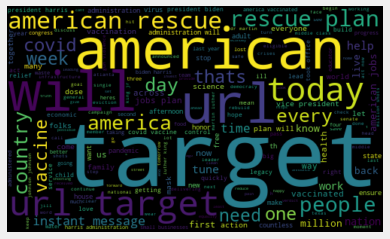

In [39]:
# Plot The Word Cloud
allWords = ' '.join( [twts for twts in Newtweets['Tweets']])
wordCloud = WordCloud(width = 500, height=300, random_state = 21, max_font_size= 119).generate(allWords)
plt.imshow(wordCloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

In [40]:
Keyword=input("Type a word that you want your tweets to be related to: ")
FilteredTweets=Newtweets[Newtweets['Tweets'].str.contains(Keyword)]
pd.set_option('display.max_colwidth',-1)
FilteredTweets = FilteredTweets.reset_index()
FilteredTweets = FilteredTweets.drop('index', 1)
FilteredTweets

Type a word that you want your tweets to be related to: jobs


,Tweets
0,if we act now on the american jobs plan in years people will look back and say this was the moment that america won the future ||url||
1,||target|| imagine a future where we lead the world and tackle the threat of climate change with american jobs and ingenuity we can make
2,||target|| clean drinking water is infrastructure the american jobs plan will improve our water infrastructure by replacing of t
3,||target|| this week i announced the american jobs plan which will invest in our infrastructure and strengthen americas competitiveness
4,||target|| the american jobs plan will ensure every american can turn on the faucet or fountain and drink clean water ||url||
5,the american jobs plan is the largest american jobs investment since world war ii
6,under the american jobs plan of our nations lead pipes and service lines will be replacedso every child in america can turn on the faucet or fountain and drink clean water we ||not|| delay another minute
7,wall street didnt build this countrythe great american middle class did this time when we rebuild the middle class under the american jobs plan were bringing everyone along
8,delivering for the american people is what the american rescue plan was about its what the american jobs plan is about we can do this we have to do this we will do this
9,the american jobs plan is a once in a generation investment in america it will modernize miles of highways roads and main streets repair bridges desperately in need of upgrades replace of our nations lead pipes and service lines


In [41]:
# Detection of the Filtered tweets

# Transform our new data into bag of words using the countvectoroizer function applied in the loaded model
transformedtweets_filtered=pickle_cv.transform(FilteredTweets['Tweets'])
testpredictions_filtered=pickle_model.predict(transformedtweets_filtered)
# Transform our sentiments detected into a dataframe 
testpred_dt_filtered=pd.DataFrame(testpredictions_filtered, columns=['Sentiment']) 
# Join the tweets and their corresponding detected sentiment
FilteredTweets['Sentiment']= testpred_dt_filtered['Sentiment']
FilteredTweets.Sentiment = FilteredTweets.Sentiment.astype(float)
pd.set_option('display.max_colwidth',-1)
FilteredTweets



,Tweets,Sentiment
0,if we act now on the american jobs plan in years people will look back and say this was the moment that america won the future ||url||,1.0
1,||target|| imagine a future where we lead the world and tackle the threat of climate change with american jobs and ingenuity we can make,1.0
2,||target|| clean drinking water is infrastructure the american jobs plan will improve our water infrastructure by replacing of t,1.0
3,||target|| this week i announced the american jobs plan which will invest in our infrastructure and strengthen americas competitiveness,1.0
4,||target|| the american jobs plan will ensure every american can turn on the faucet or fountain and drink clean water ||url||,1.0
5,the american jobs plan is the largest american jobs investment since world war ii,1.0
6,under the american jobs plan of our nations lead pipes and service lines will be replacedso every child in america can turn on the faucet or fountain and drink clean water we ||not|| delay another minute,1.0
7,wall street didnt build this countrythe great american middle class did this time when we rebuild the middle class under the american jobs plan were bringing everyone along,0.0
8,delivering for the american people is what the american rescue plan was about its what the american jobs plan is about we can do this we have to do this we will do this,1.0
9,the american jobs plan is a once in a generation investment in america it will modernize miles of highways roads and main streets repair bridges desperately in need of upgrades replace of our nations lead pipes and service lines,1.0


In [35]:
# Detection of all tweets retrieved

# Transform our new data into bag of words using the countvectoroizer function applied in the loaded model
transformedtweets=pickle_cv.transform(Newtweets['Tweets'])
testpredictions=pickle_model.predict(transformedtweets)
# Transform our sentiments detected into a dataframe 
testpred_dt=pd.DataFrame(testpredictions, columns=['Sentiment']) 
# Join the tweets and their corresponding detected sentiment
Newtweets['Sentiment']= testpred_dt['Sentiment']
Newtweets.Sentiment = Newtweets.Sentiment.astype(float)
pd.set_option('display.max_colwidth',-1)
Newtweets

,Tweets,Sentiment
0,||target|| the guilty verdict does ||not|| bring back george floyd but through the familys pain they are finding purpose so georges legacy,0.0
1,||target|| today a jury in minnesota found former minneapolis police officer derek chauvin guilty of murdering george floyd the verdict,0.0
2,||target|| live president biden and vice president harris address the nation on the verdict in the trial of derek chauvin ||url||,1.0
3,if we act now on the american jobs plan in years people will look back and say this was the moment that america won the future ||url||,1.0
4,today every adult is eligible to get a covid vaccine better days are ahead,0.0
...,...,...
195,i urge every american to wear a mask stay socially distanced avoid large indoor gatherings we can save countless lives if we step up together,1.0
196,getting america vaccinated will be one of the greatest operational challenges what ever ever faced but my administration will spare no effort to get it done were going to ensure the vaccine is distributed quickly equitably and free of charge to every american,0.0
197,folks i just received the second dose of my covid vaccine and just like the first dose it was safe quick and painless i urge everyone to get vaccinated once its your turn because only together can we save lives and beat this virus ||url||,1.0
198,the work of the next four years must be the restoration of democracy and the recovery of respect for the rule of law and the renewal of a politics thats about solving problems ||not|| stoking the angry comments of hate and chaos,0.0
